## Fret Frequency Plot

In [7]:
import sys
sys.path.append("../scripts")
from filter_by_tuning import *
from constants import TUNING_LABELS

In [8]:
# Load and filter data by tuning
drop_d = load_analysis_file_by_tuning(filepath="analysis_results.json", tuning_label="Drop D")
open_d = load_analysis_file_by_tuning(filepath="analysis_results.json", tuning_label="Open D")
standard = load_analysis_file_by_tuning(filepath="analysis_results.json", tuning_label="Standard")
drop_c = load_analysis_file_by_tuning(filepath="analysis_results.json", tuning_label="Drop C")

In [10]:
drop_c

[{'title': 'Shed My Skin',
  'artist': 'Alter Bridge',
  'track_name': 'Guitar1 (elec clean)',
  'tuning': [62, 57, 53, 48, 43, 36],
  'tuning_label': 'Drop C',
  'string_fret_frequency': {'1': {'0': 56, '12': 1, '5': 30},
   '2': {'0': 12, '12': 1, '7': 37, '5': 39, '8': 12},
   '3': {'0': 18, '7': 84, '12': 1, '6': 12},
   '4': {'9': 8, '7': 31, '5': 31, '4': 36, '2': 8, '0': 49, '12': 1},
   '5': {'0': 55, '2': 10, '5': 31, '12': 1},
   '6': {'5': 48, '0': 59, '12': 1}}},
 {'title': 'Shed My Skin',
  'artist': 'Alter Bridge',
  'track_name': 'Guitar2 (acoustic)',
  'tuning': [62, 57, 53, 48, 43, 36],
  'tuning_label': 'Drop C',
  'string_fret_frequency': {'1': {'0': 154, '12': 1, '2': 57, '3': 8, '5': 94},
   '2': {'0': 17, '12': 1, '3': 16, '2': 53, '8': 52, '7': 145, '5': 67},
   '3': {'0': 35, '7': 247, '12': 4, '4': 66, '2': 10, '6': 34, '11': 3},
   '4': {'9': 8,
    '7': 54,
    '5': 96,
    '4': 106,
    '2': 10,
    '0': 164,
    '12': 1,
    '1': 15},
   '5': {'0': 197,
   

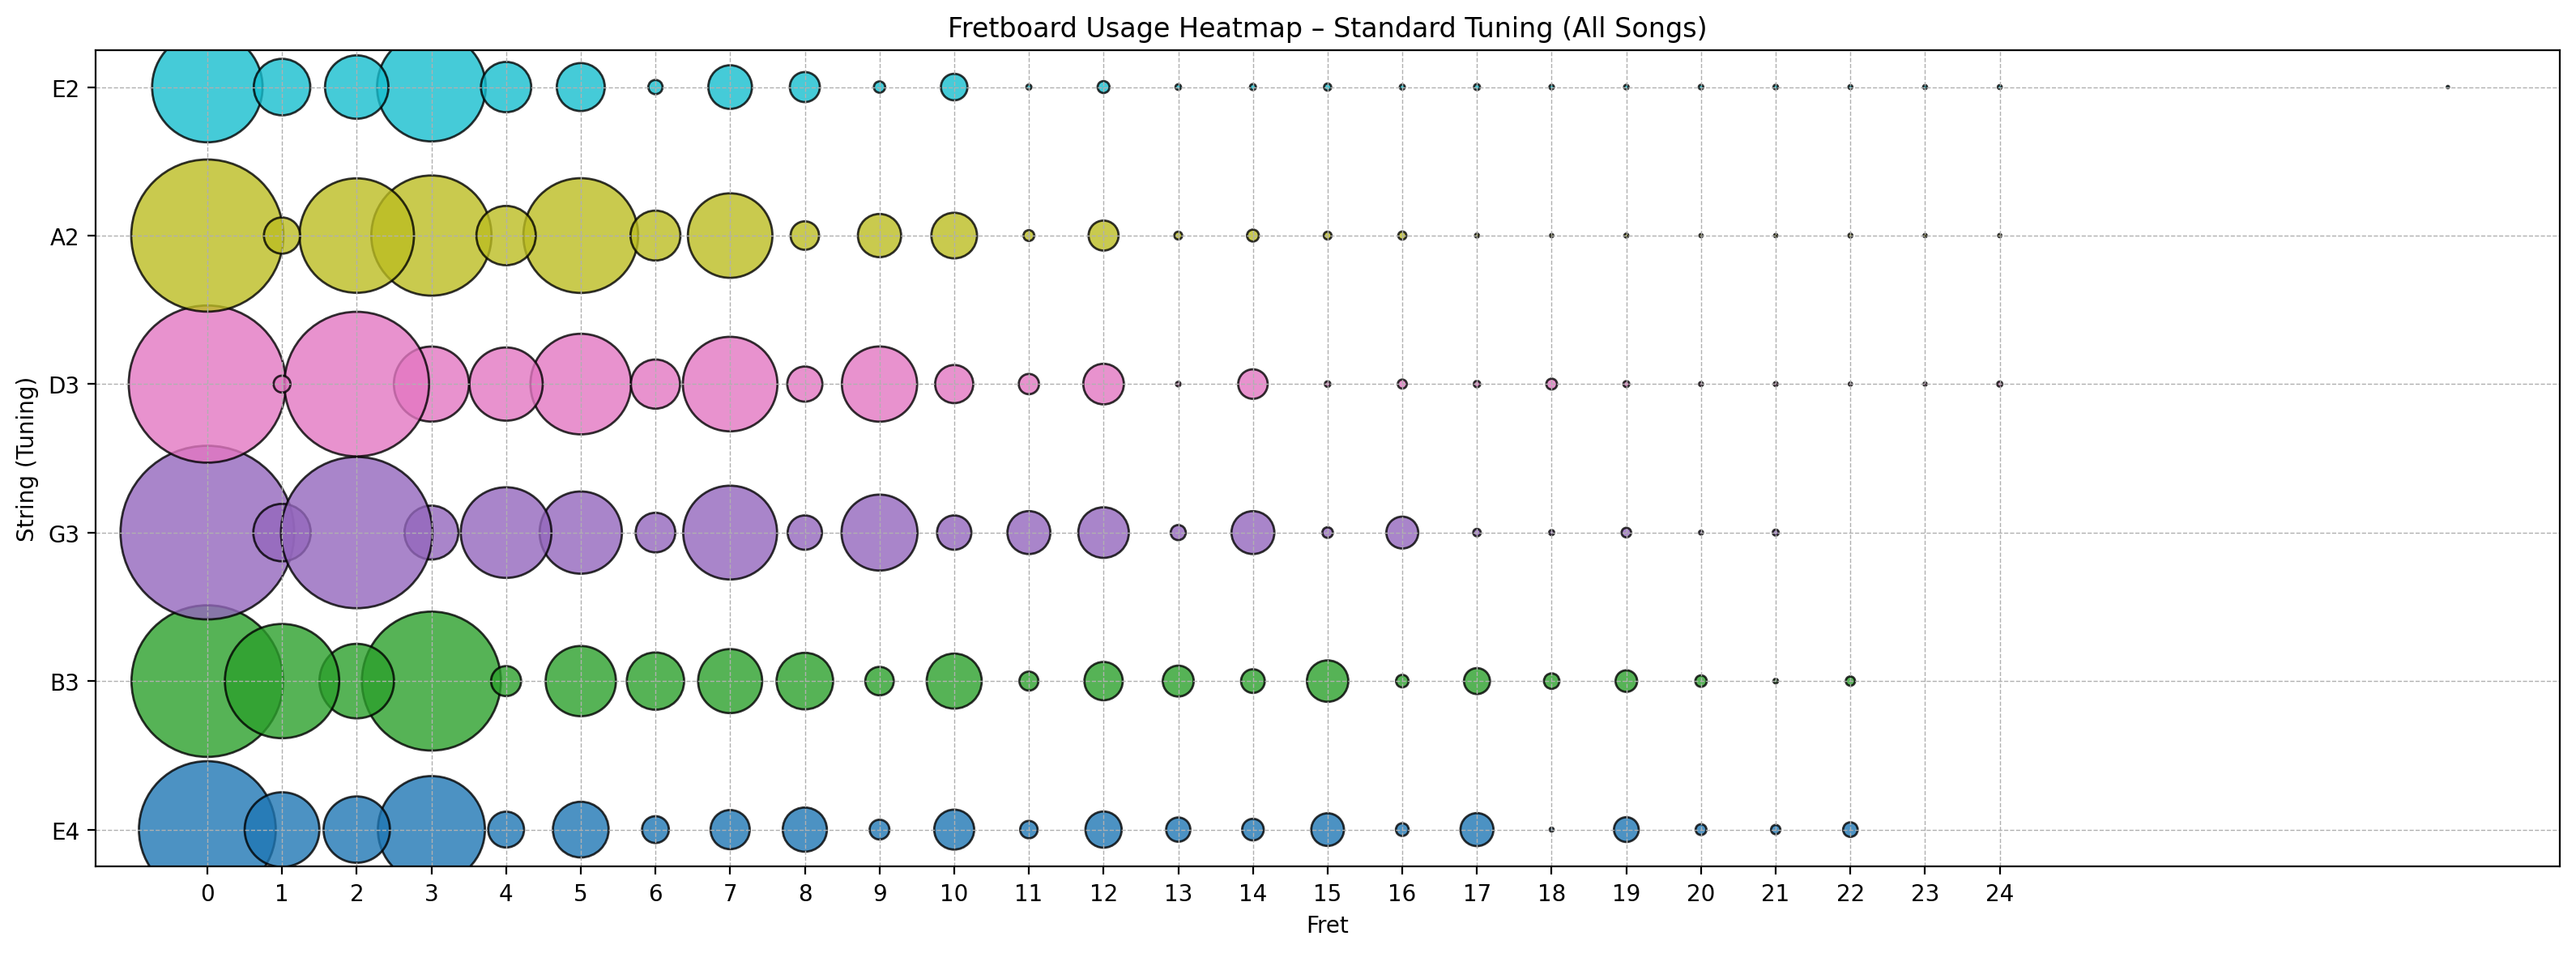

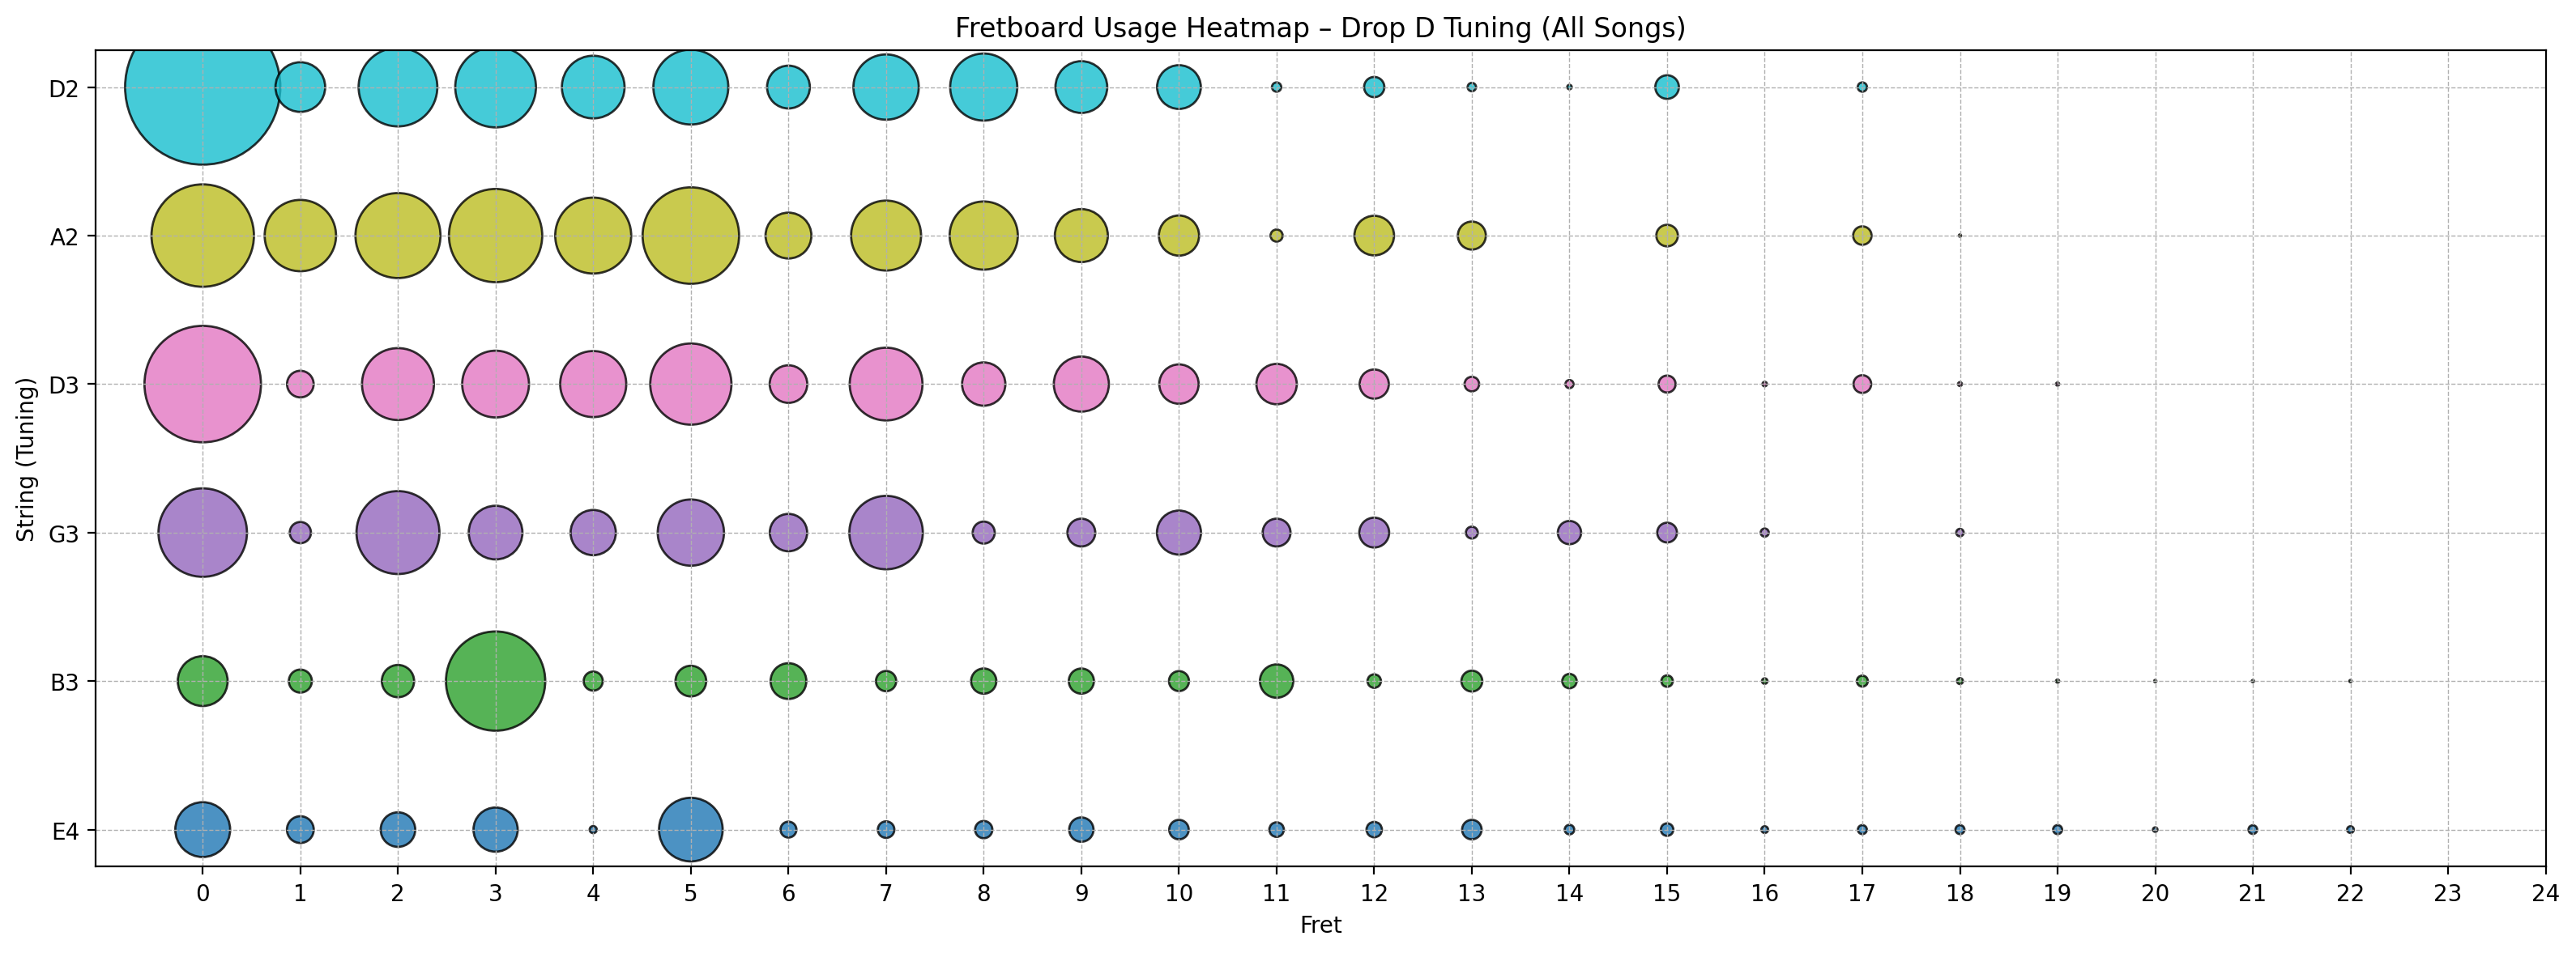

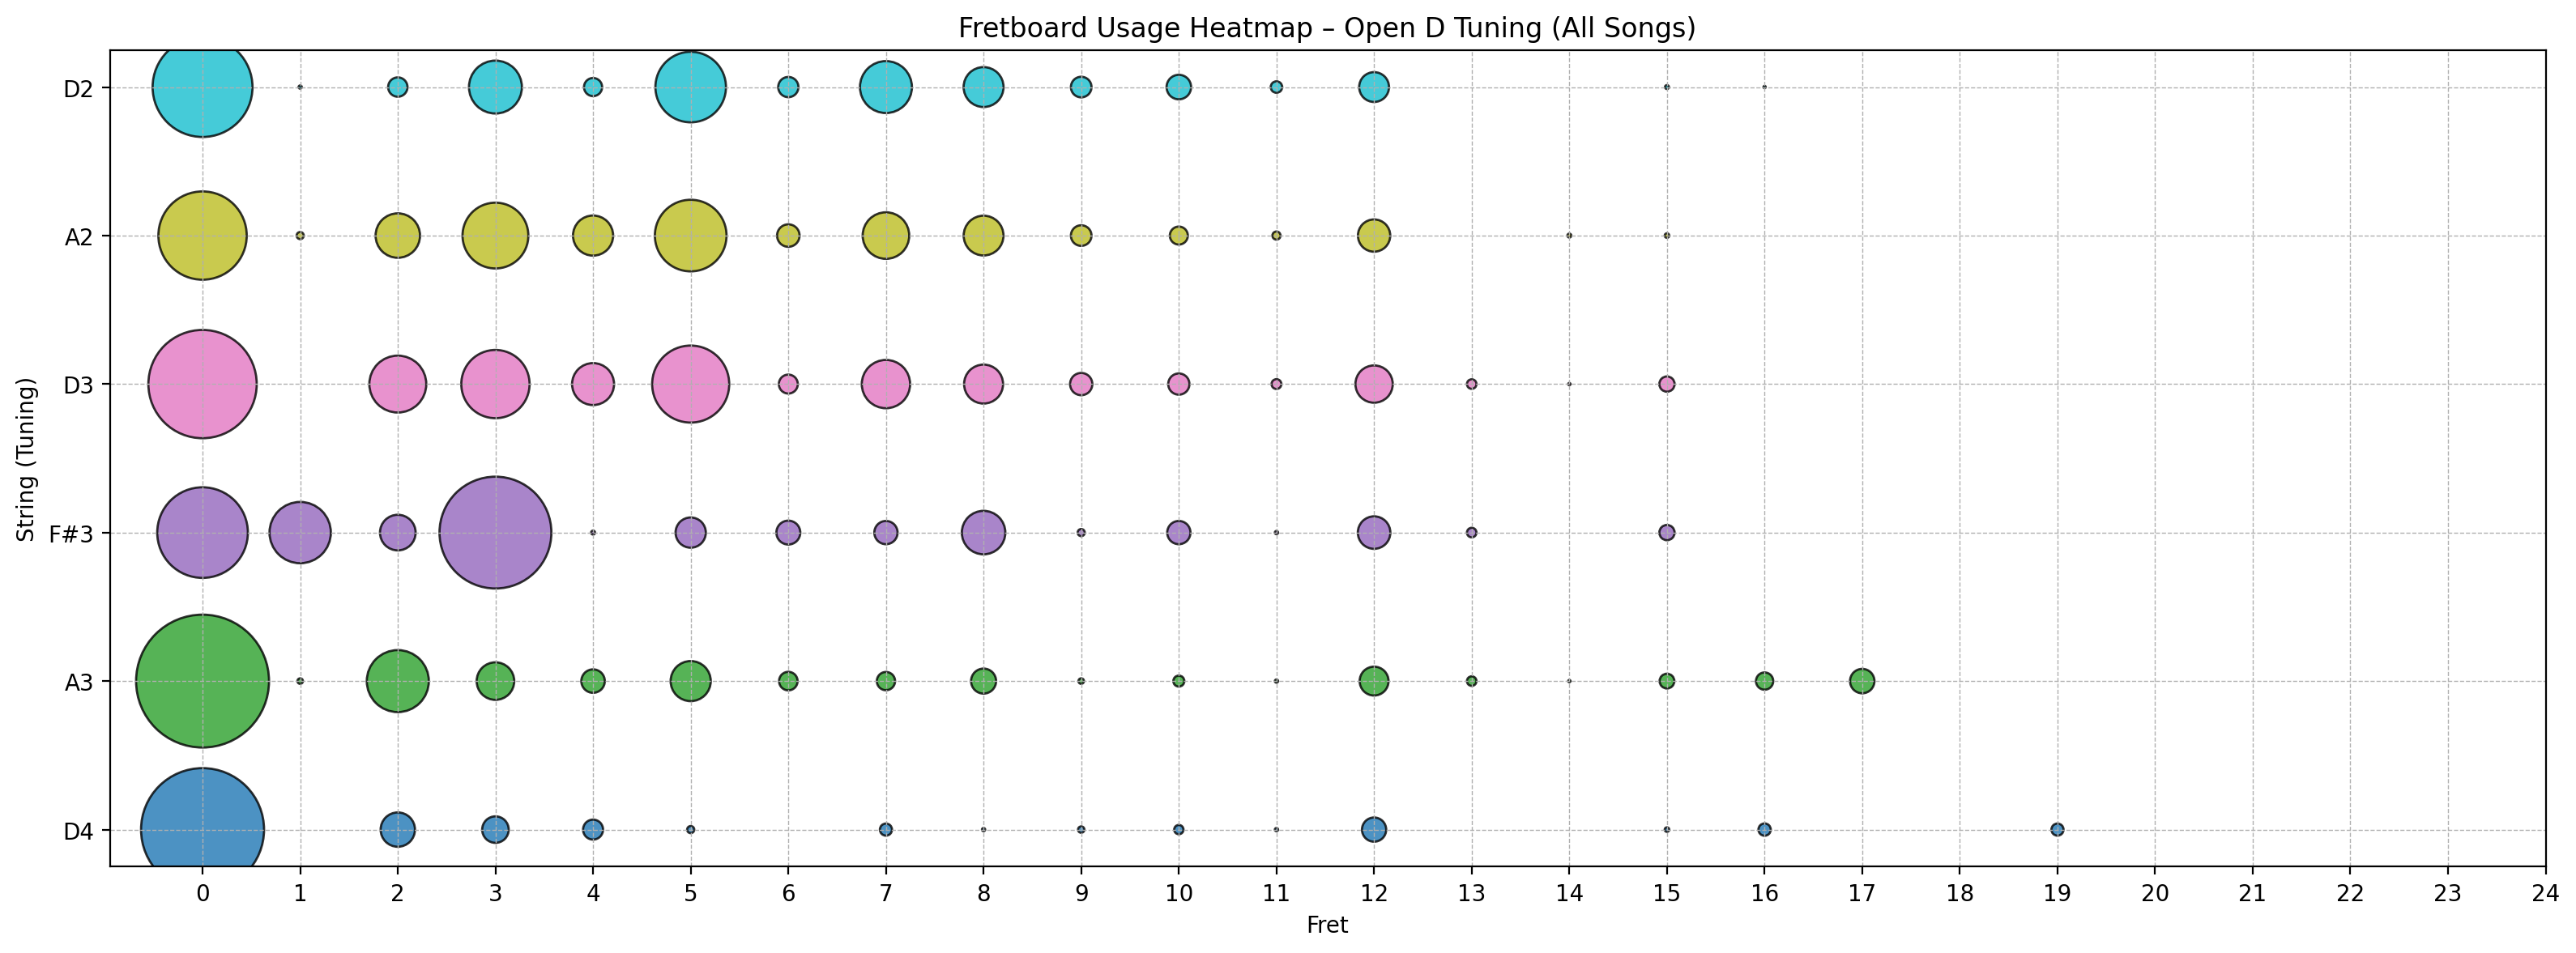

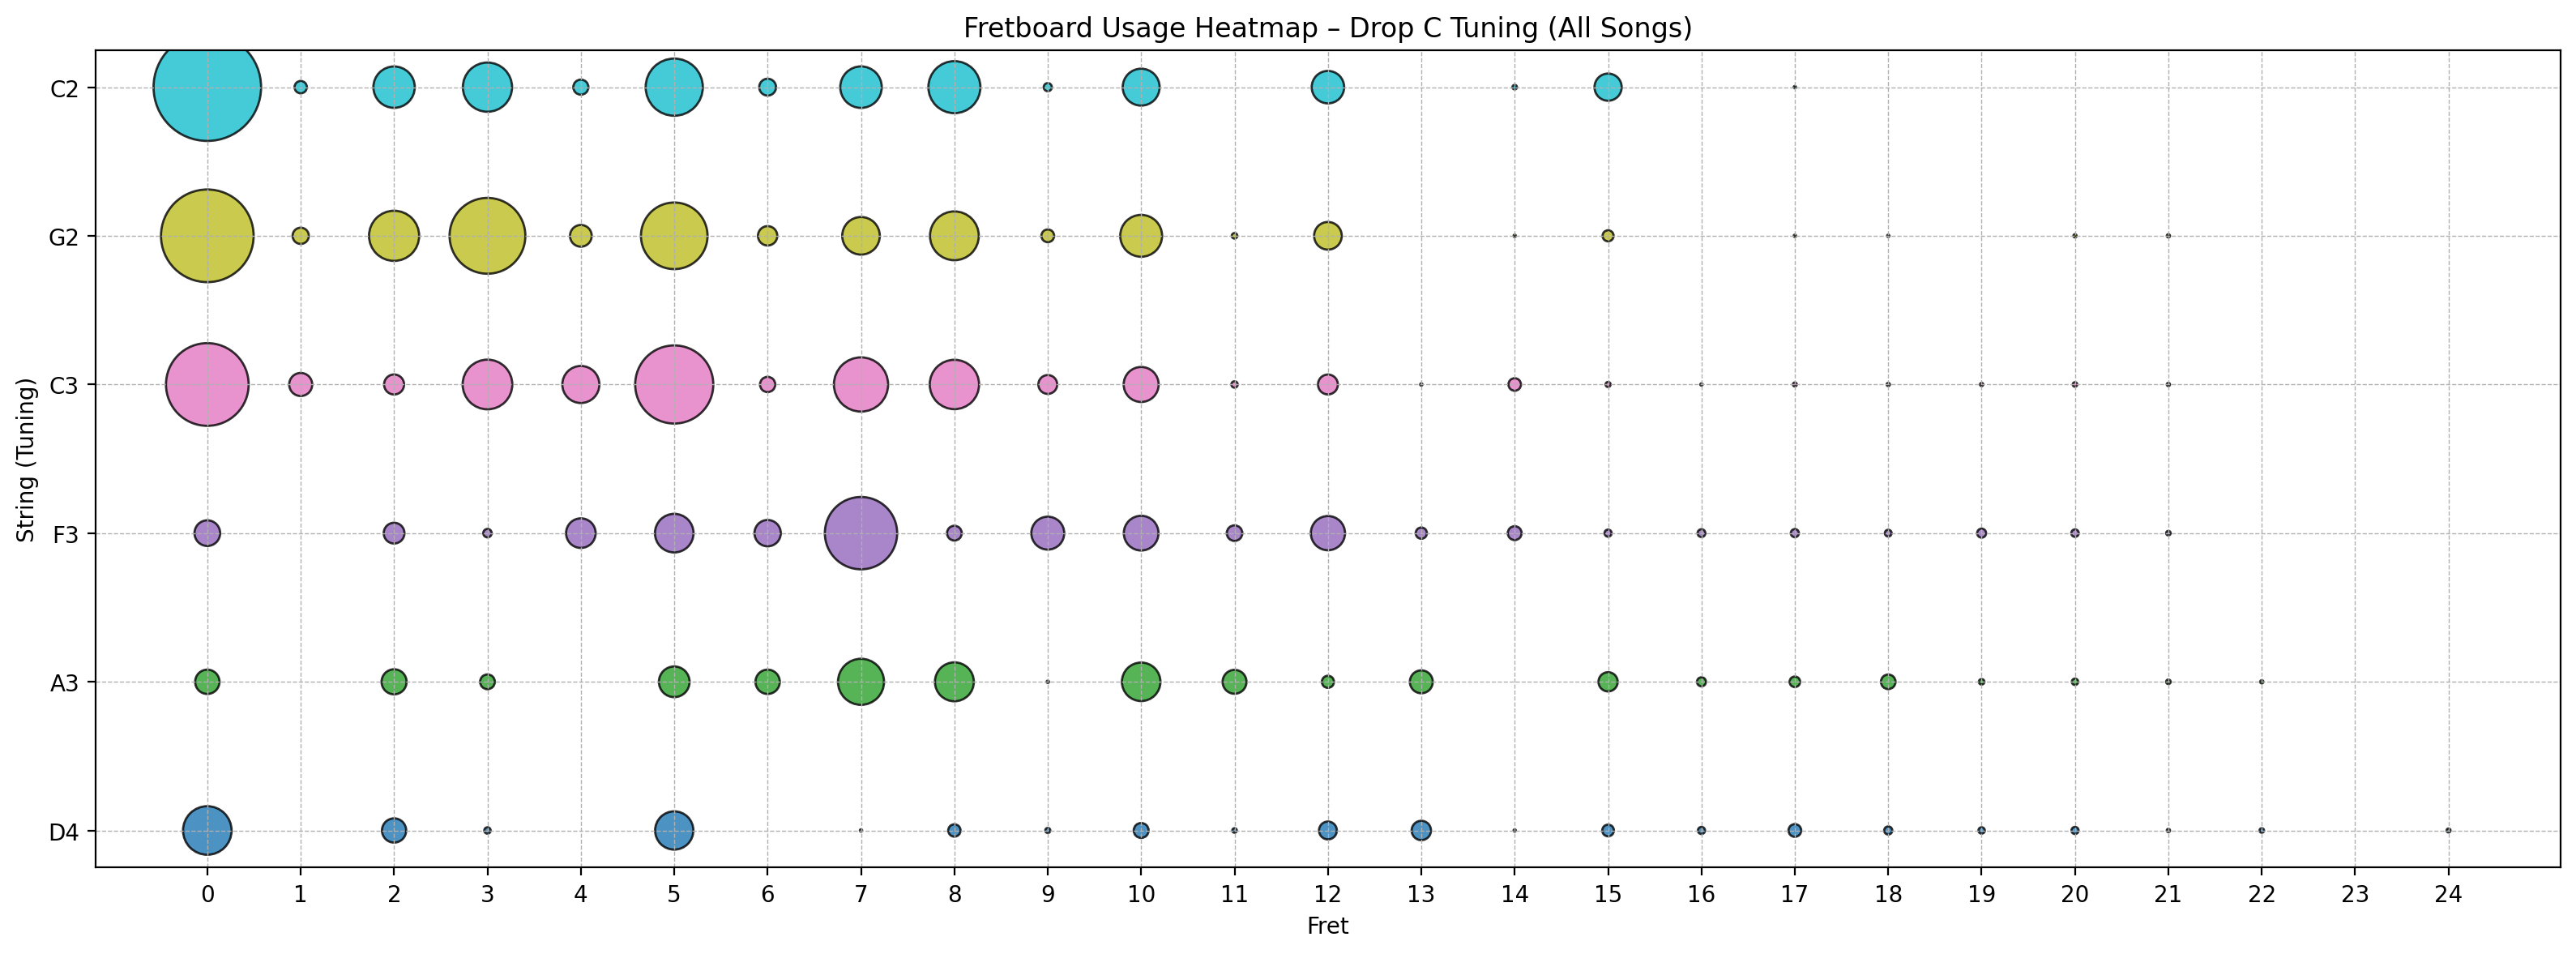

In [12]:
import matplotlib.pyplot as plt
from music21 import pitch
from collections import defaultdict
import json

# Your tuning labels (used only for fallback or display)
TUNING_LABELS = {
    "Standard": (64, 59, 55, 50, 45, 40),
    "Drop D": (64, 59, 55, 50, 45, 38),
    "Open D": (62, 57, 54, 50, 45, 38),
    "Drop C": (62, 57, 53, 48, 43, 36),
}

# Assuming you've already called:
# drop_c = load_analysis_file_by_tuning("analysis_results.json", "Drop C")
# and similar for other tunings...

# Put your tuning datasets in a dictionary
tuning_datasets = {
    "Standard": standard,
    "Drop D": drop_d,
    "Open D": open_d,
    "Drop C": drop_c,
}

for tuning_name, tracks in tuning_datasets.items():
    if not tracks:
        print(f"Skipping {tuning_name} – no data")
        continue

    aggregate_freq = defaultdict(int)

    for track in tracks:
        freq_data = track["string_fret_frequency"]
        for string_str, fret_dict in freq_data.items():
            string_num = int(string_str)
            for fret_str, count in fret_dict.items():
                fret = int(fret_str)
                aggregate_freq[(string_num, fret)] += count

    # Plot data prep
    x, y, sizes, colors = [], [], [], []

    for (string_num, fret), count in aggregate_freq.items():
        x.append(fret)
        y.append(6 - string_num)
        sizes.append(count)
        colors.append(string_num)

    # Get most common tuning in the group for labeling
    common_tuning = TUNING_LABELS.get(tuning_name, [64, 59, 55, 50, 45, 40])
    string_labels = []
    for midi_val in reversed(common_tuning):
        p = pitch.Pitch()
        p.midi = midi_val
        string_labels.append(p.nameWithOctave)

    # Plot
    plt.figure(figsize=(16, 6))
    plt.scatter(x, y, s=sizes, c=colors, cmap='tab10', alpha=0.8, edgecolors='k')

    plt.xticks(range(0, 25))
    plt.yticks(range(6), string_labels)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlabel("Fret")
    plt.ylabel("String (Tuning)")
    plt.title(f"Fretboard Usage Heatmap – {tuning_name} Tuning (All Songs)")
    plt.tight_layout()
    plt.show()

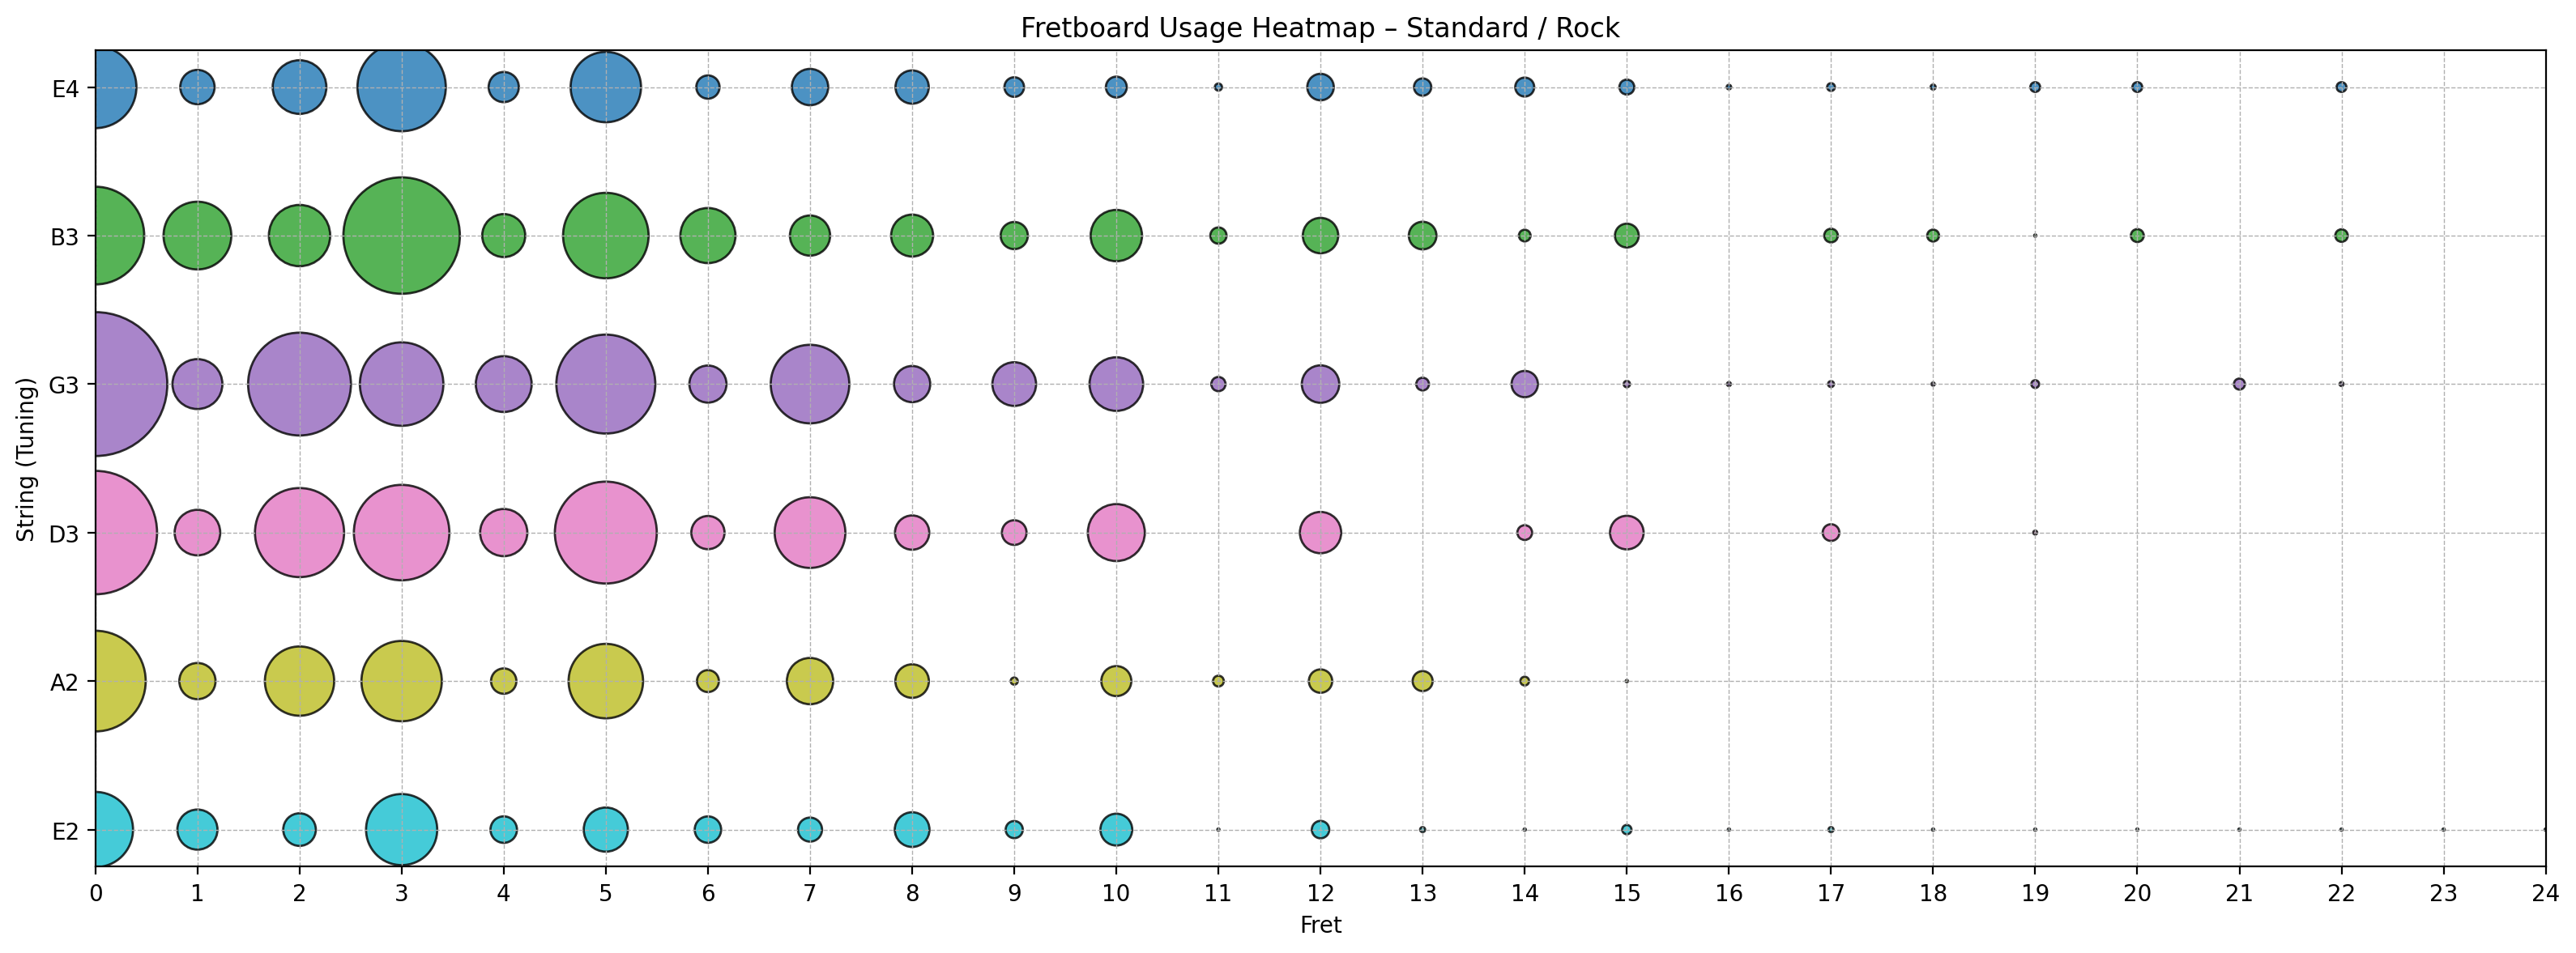

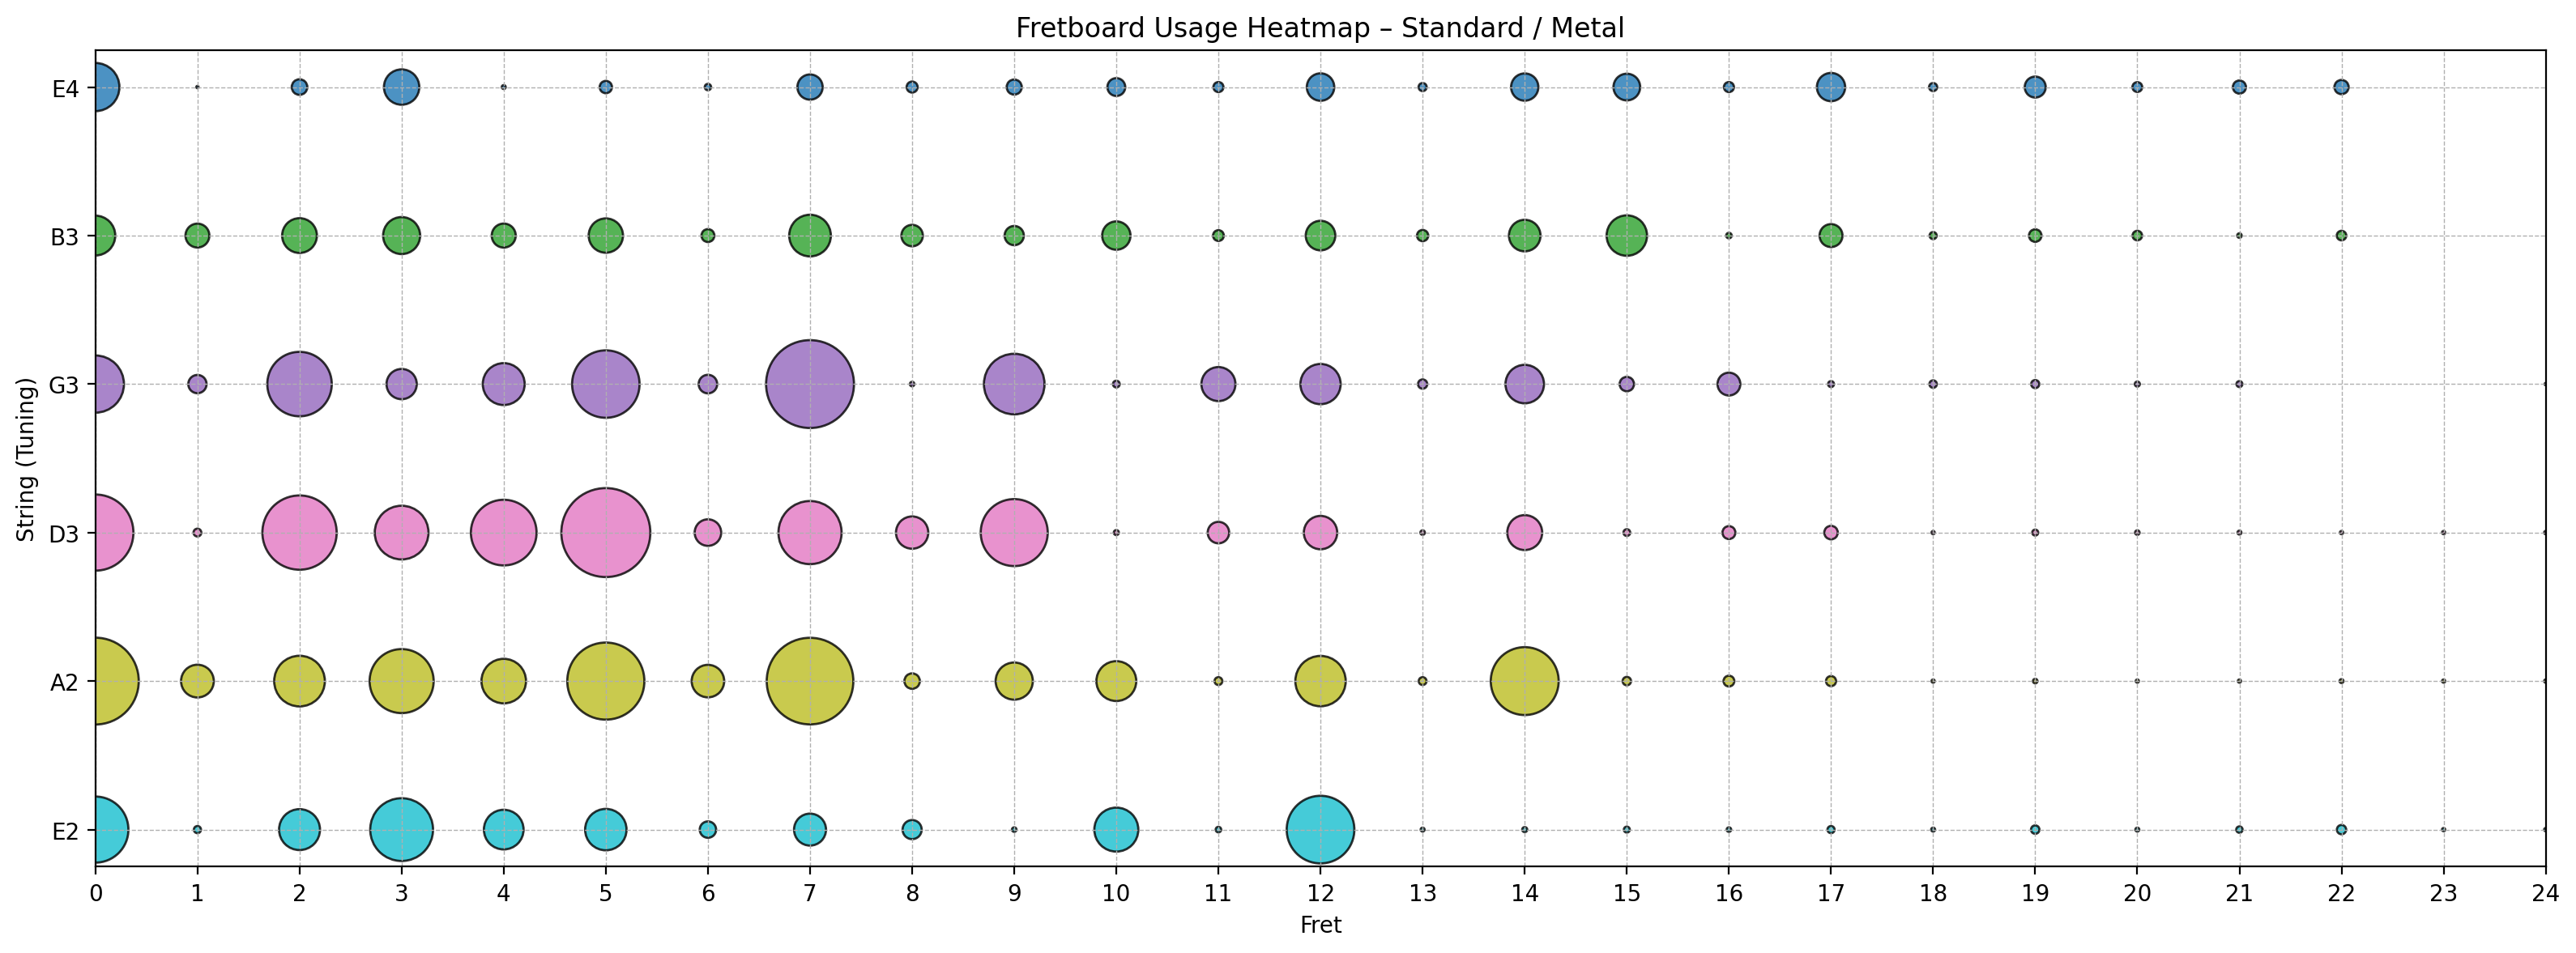

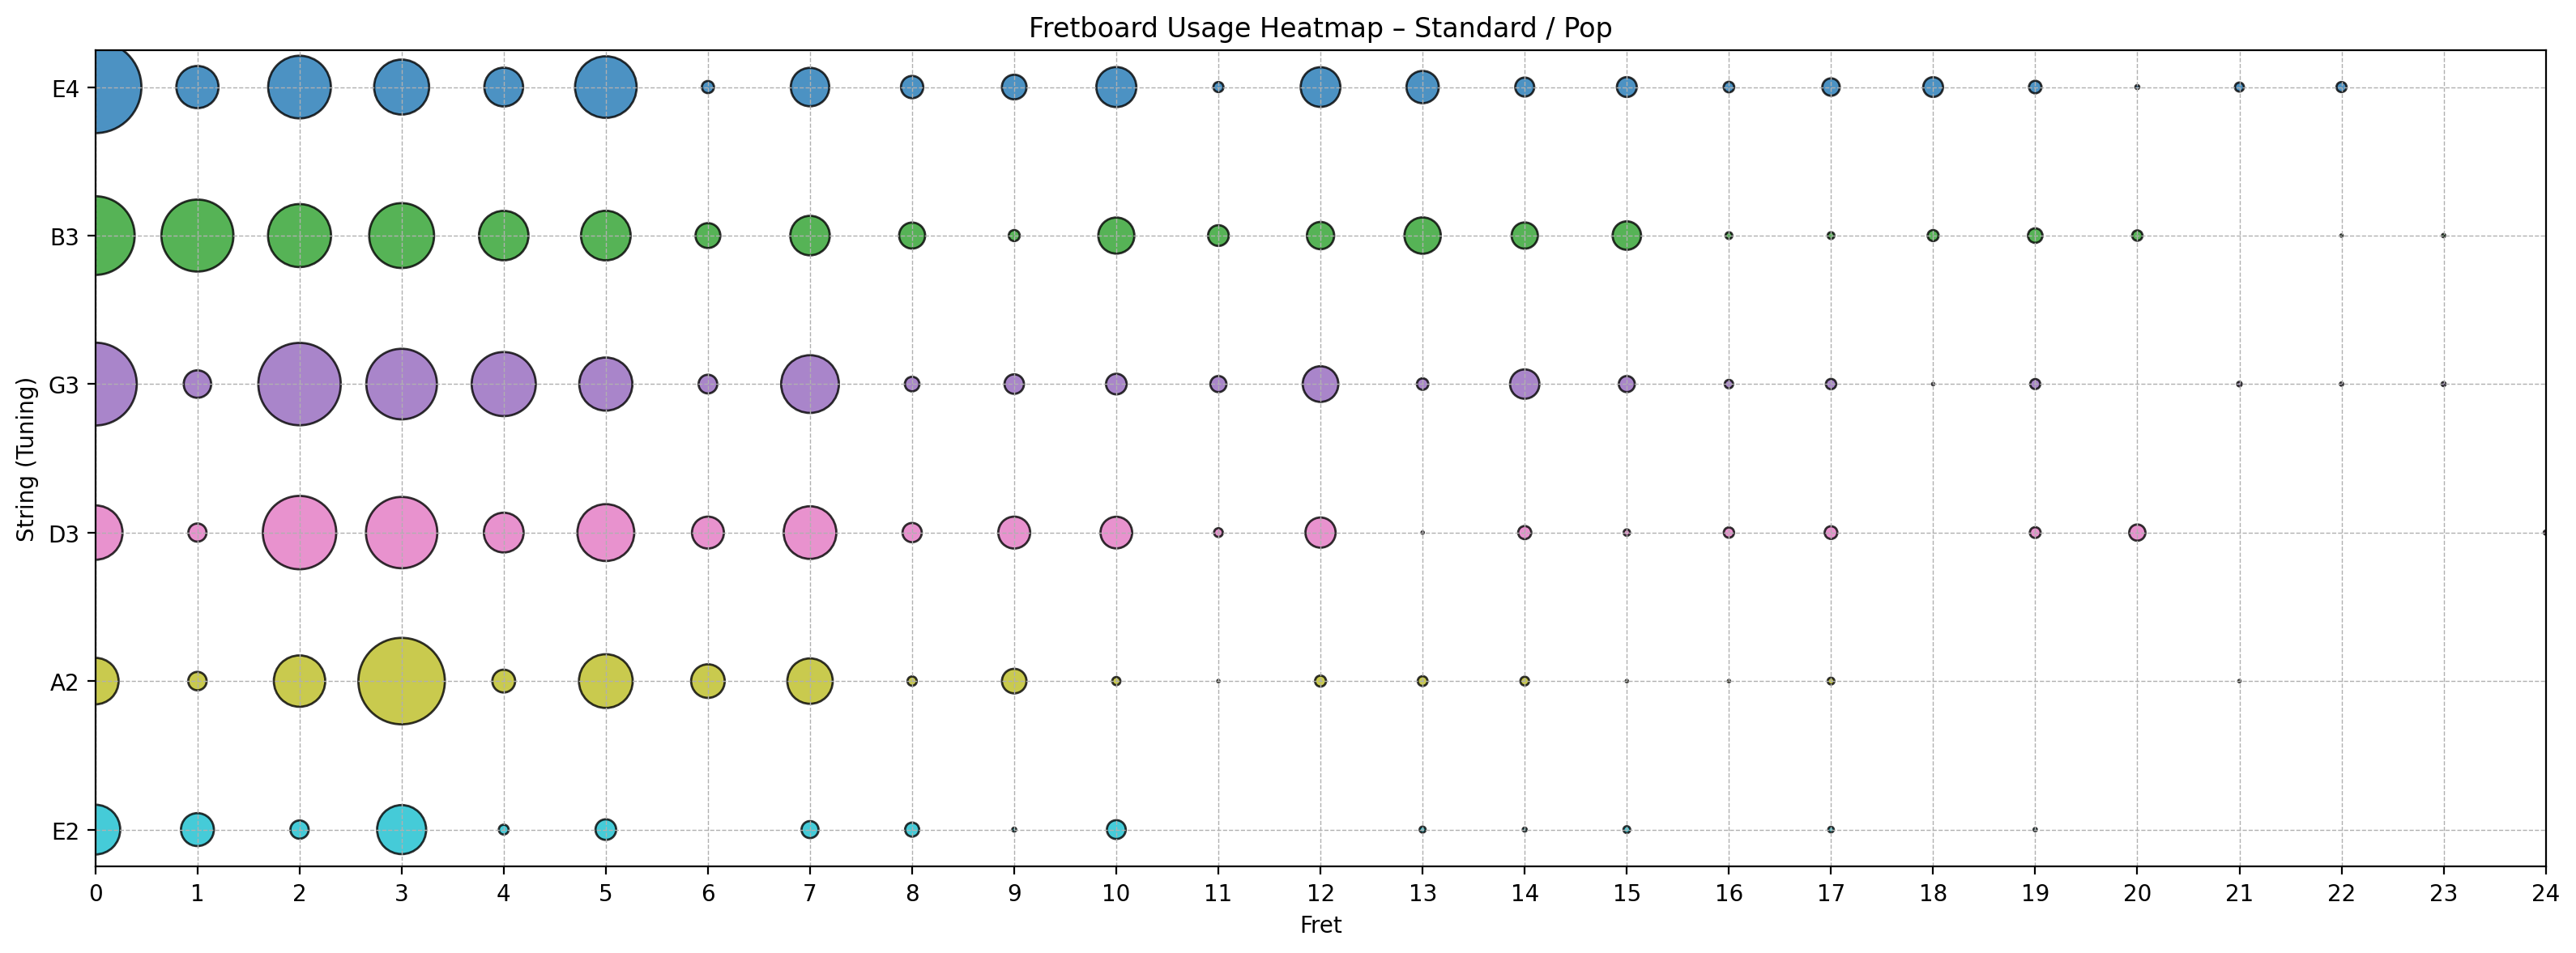

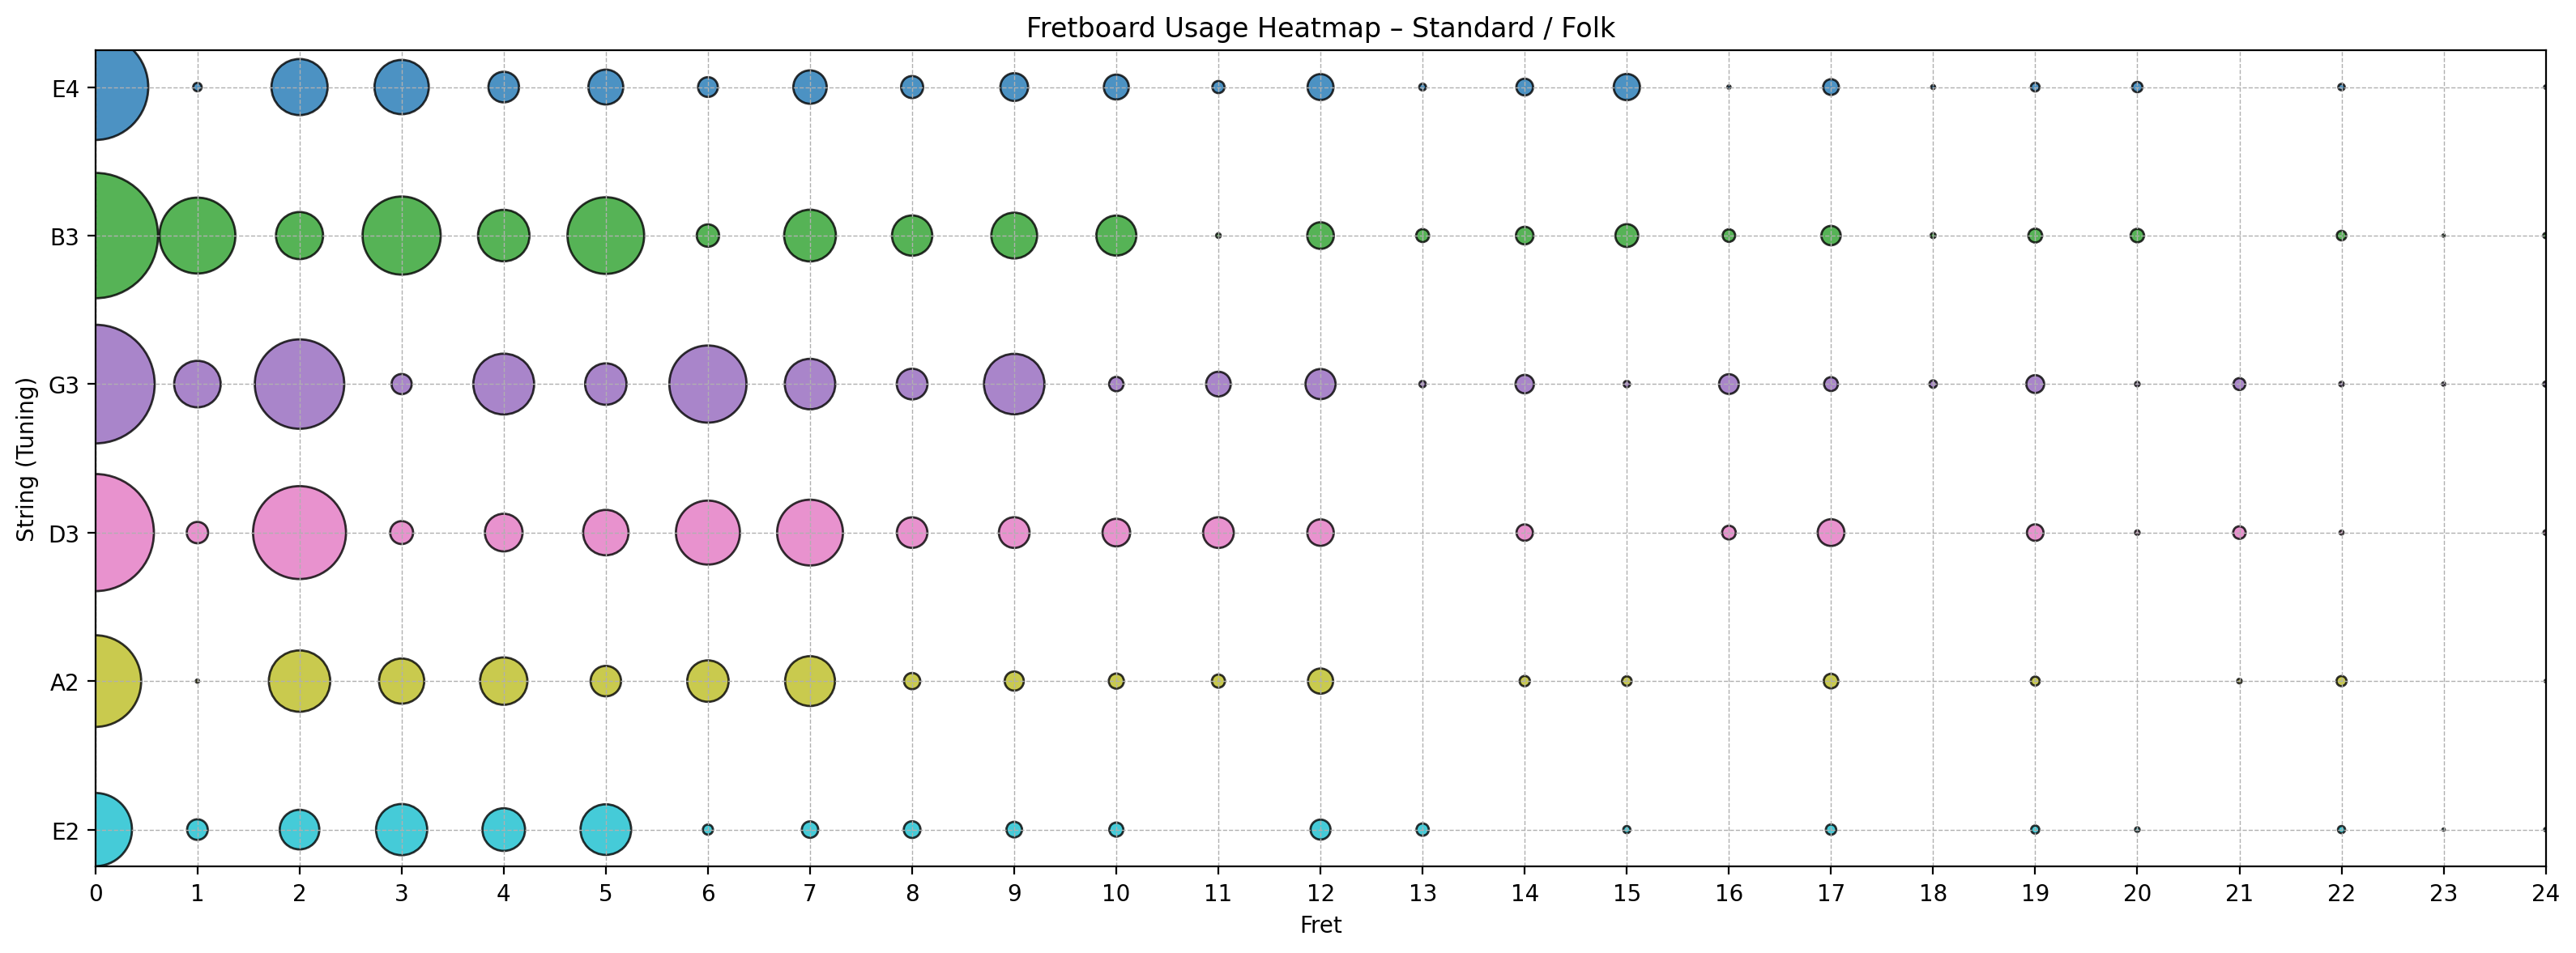

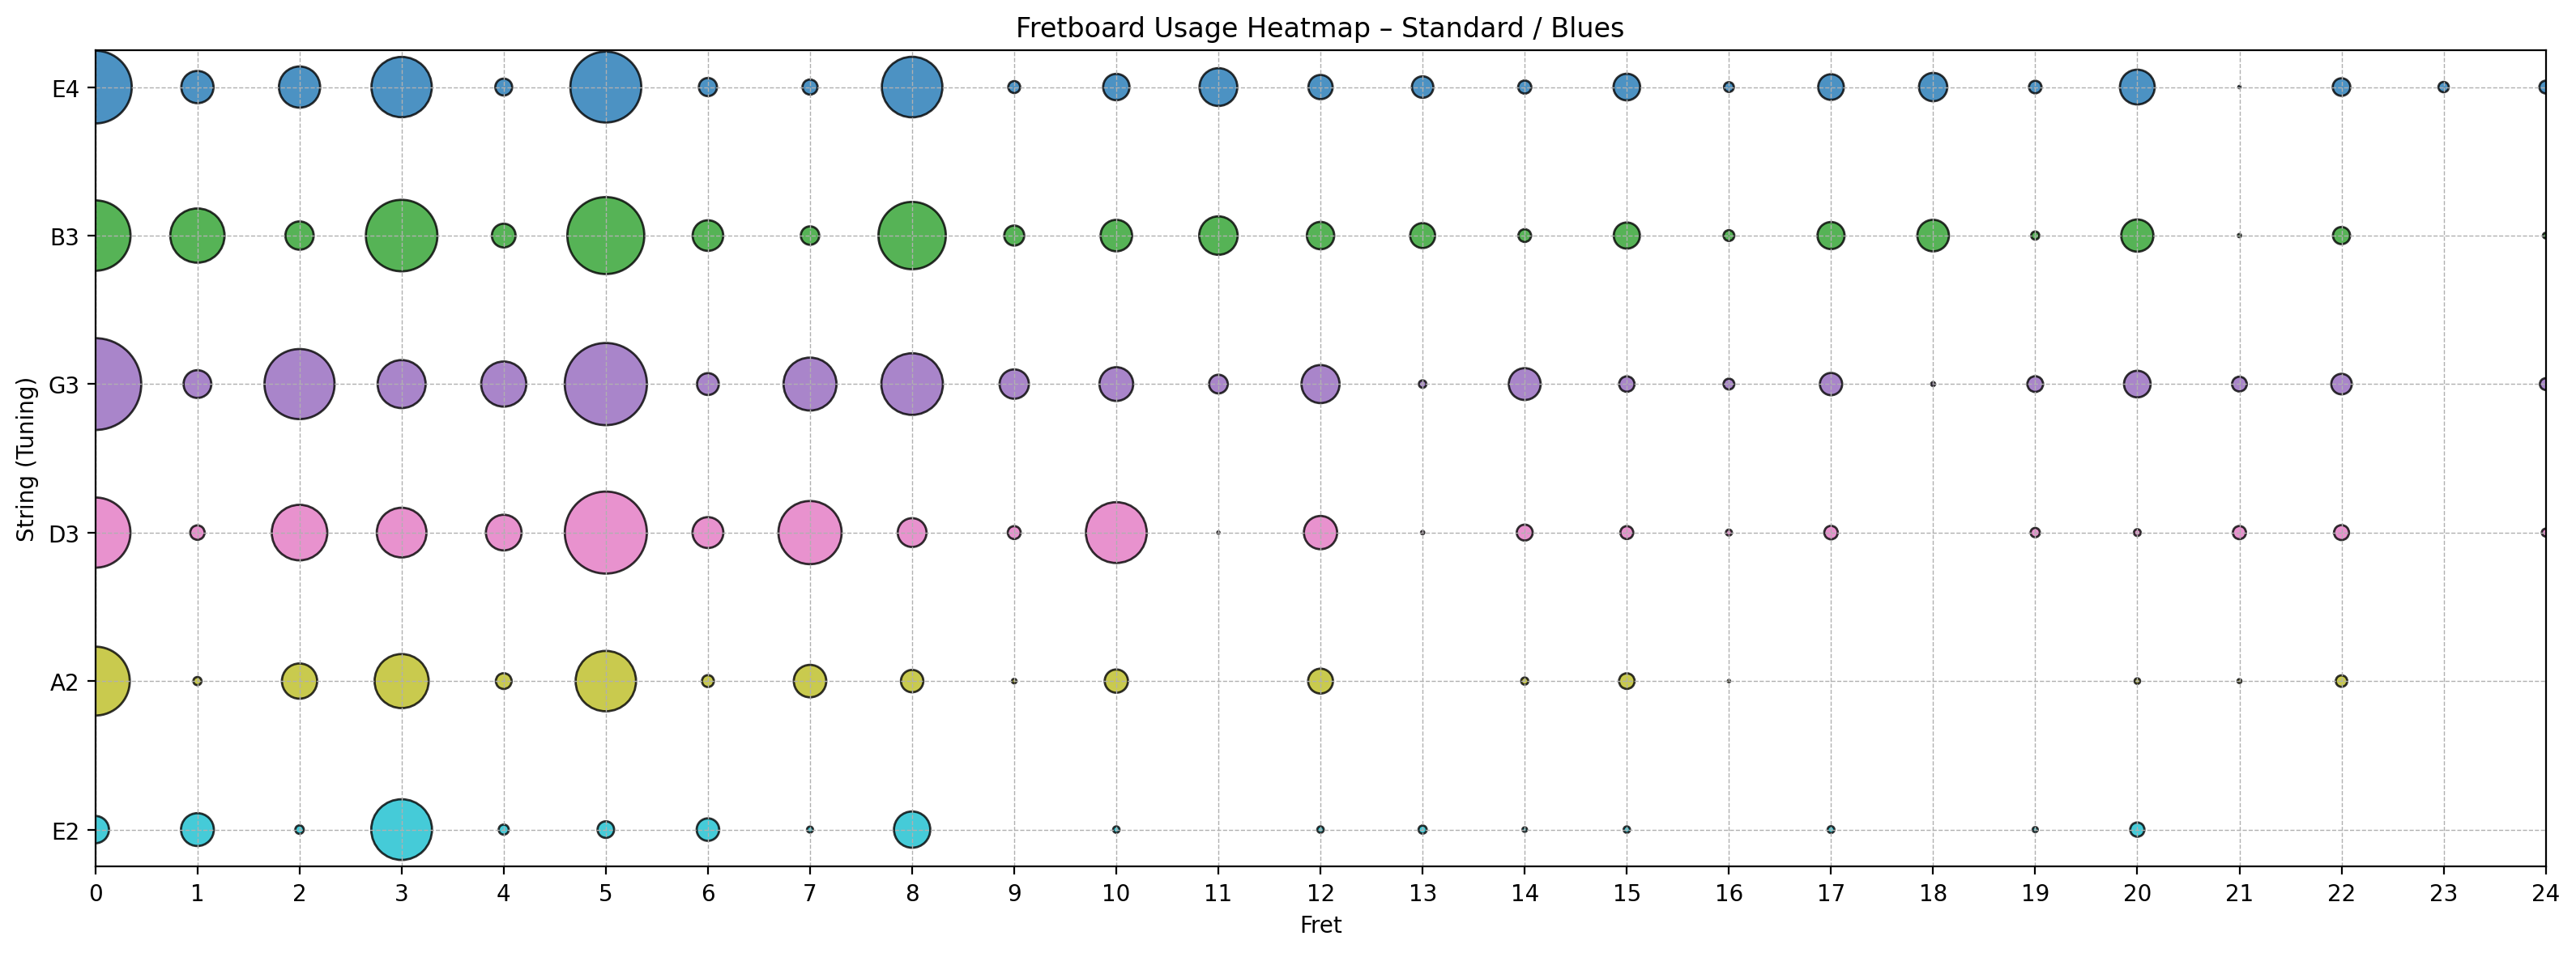

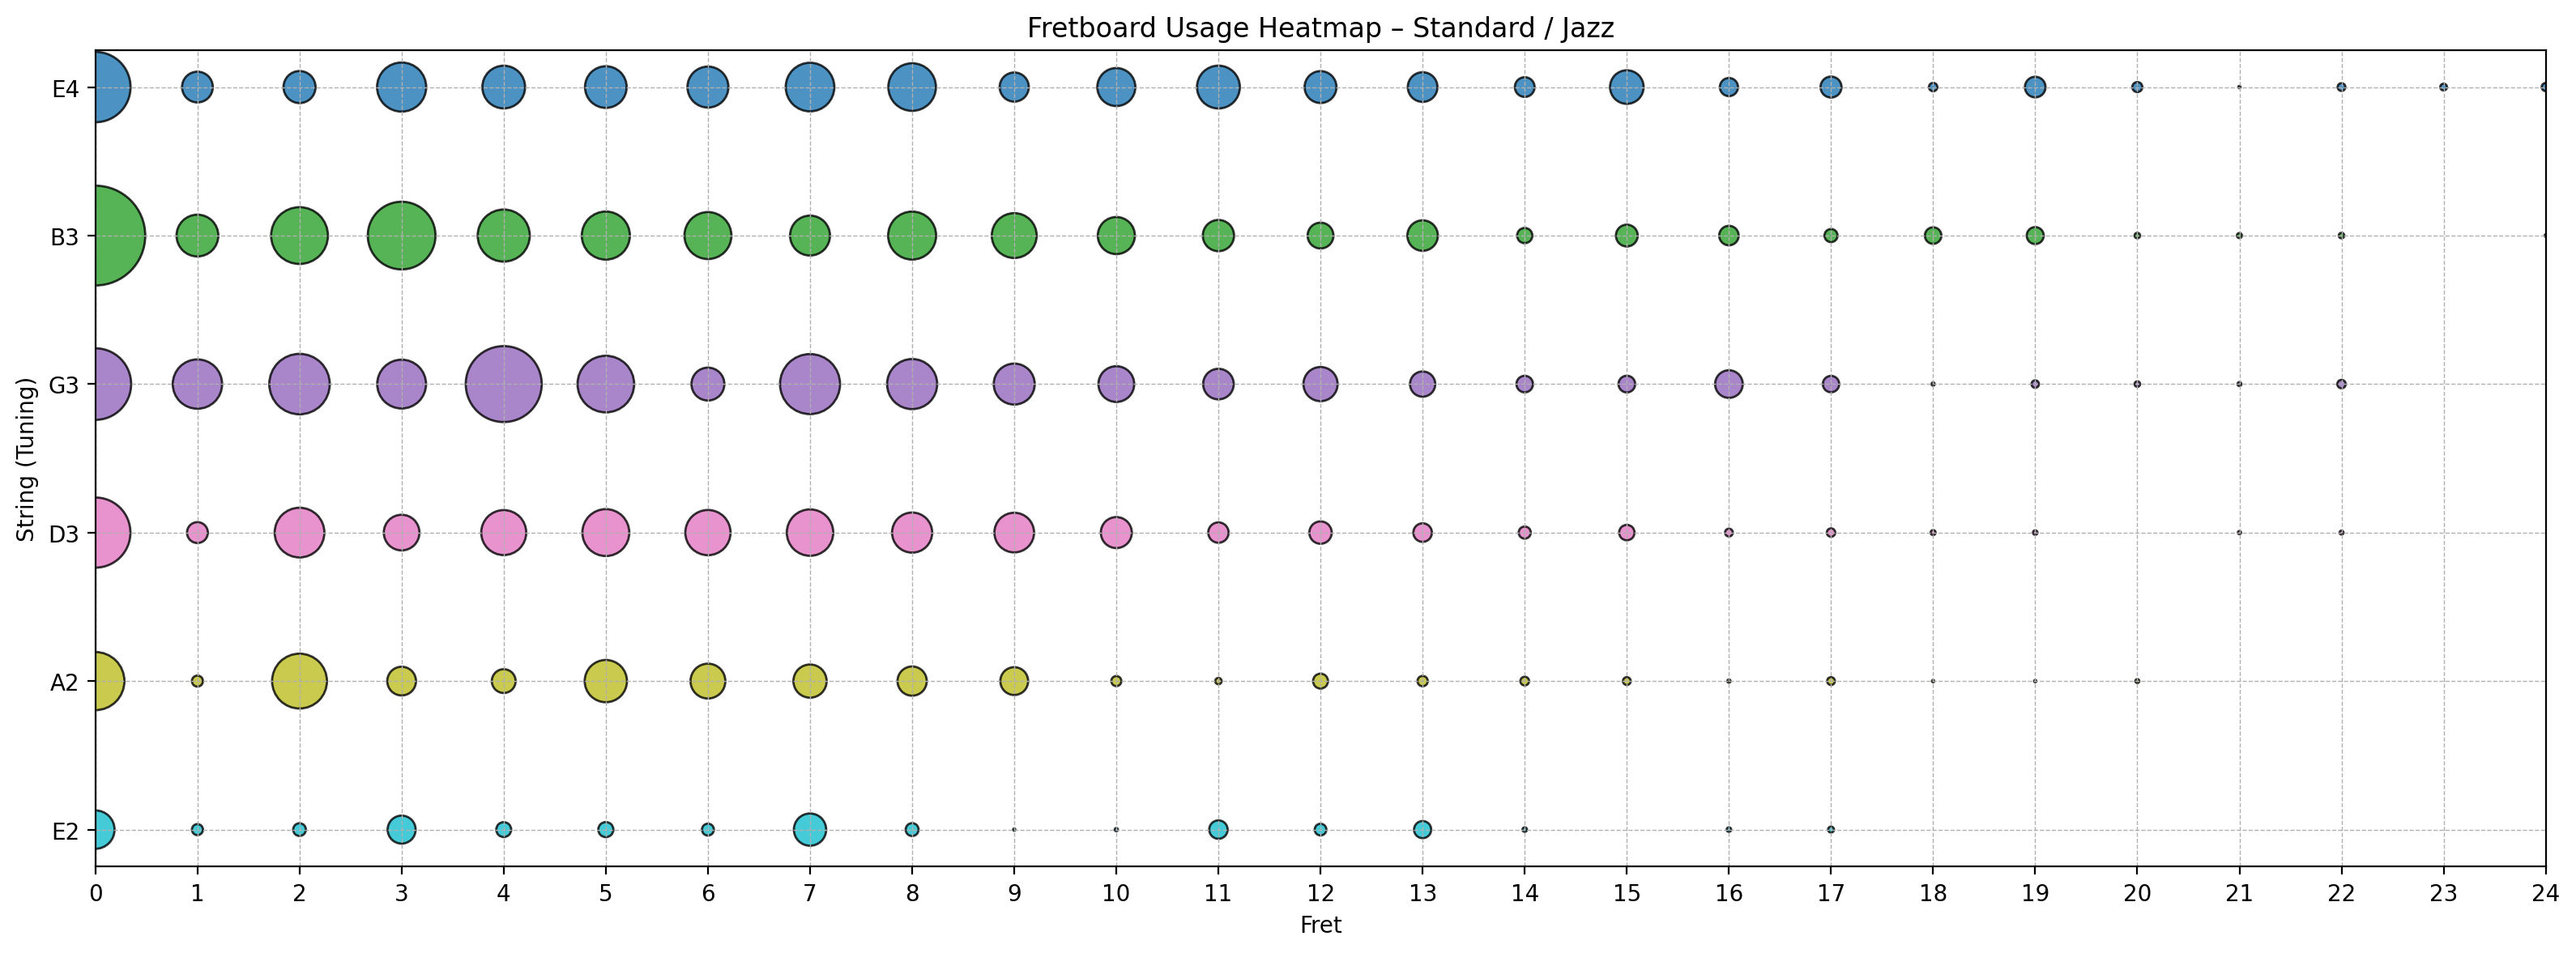

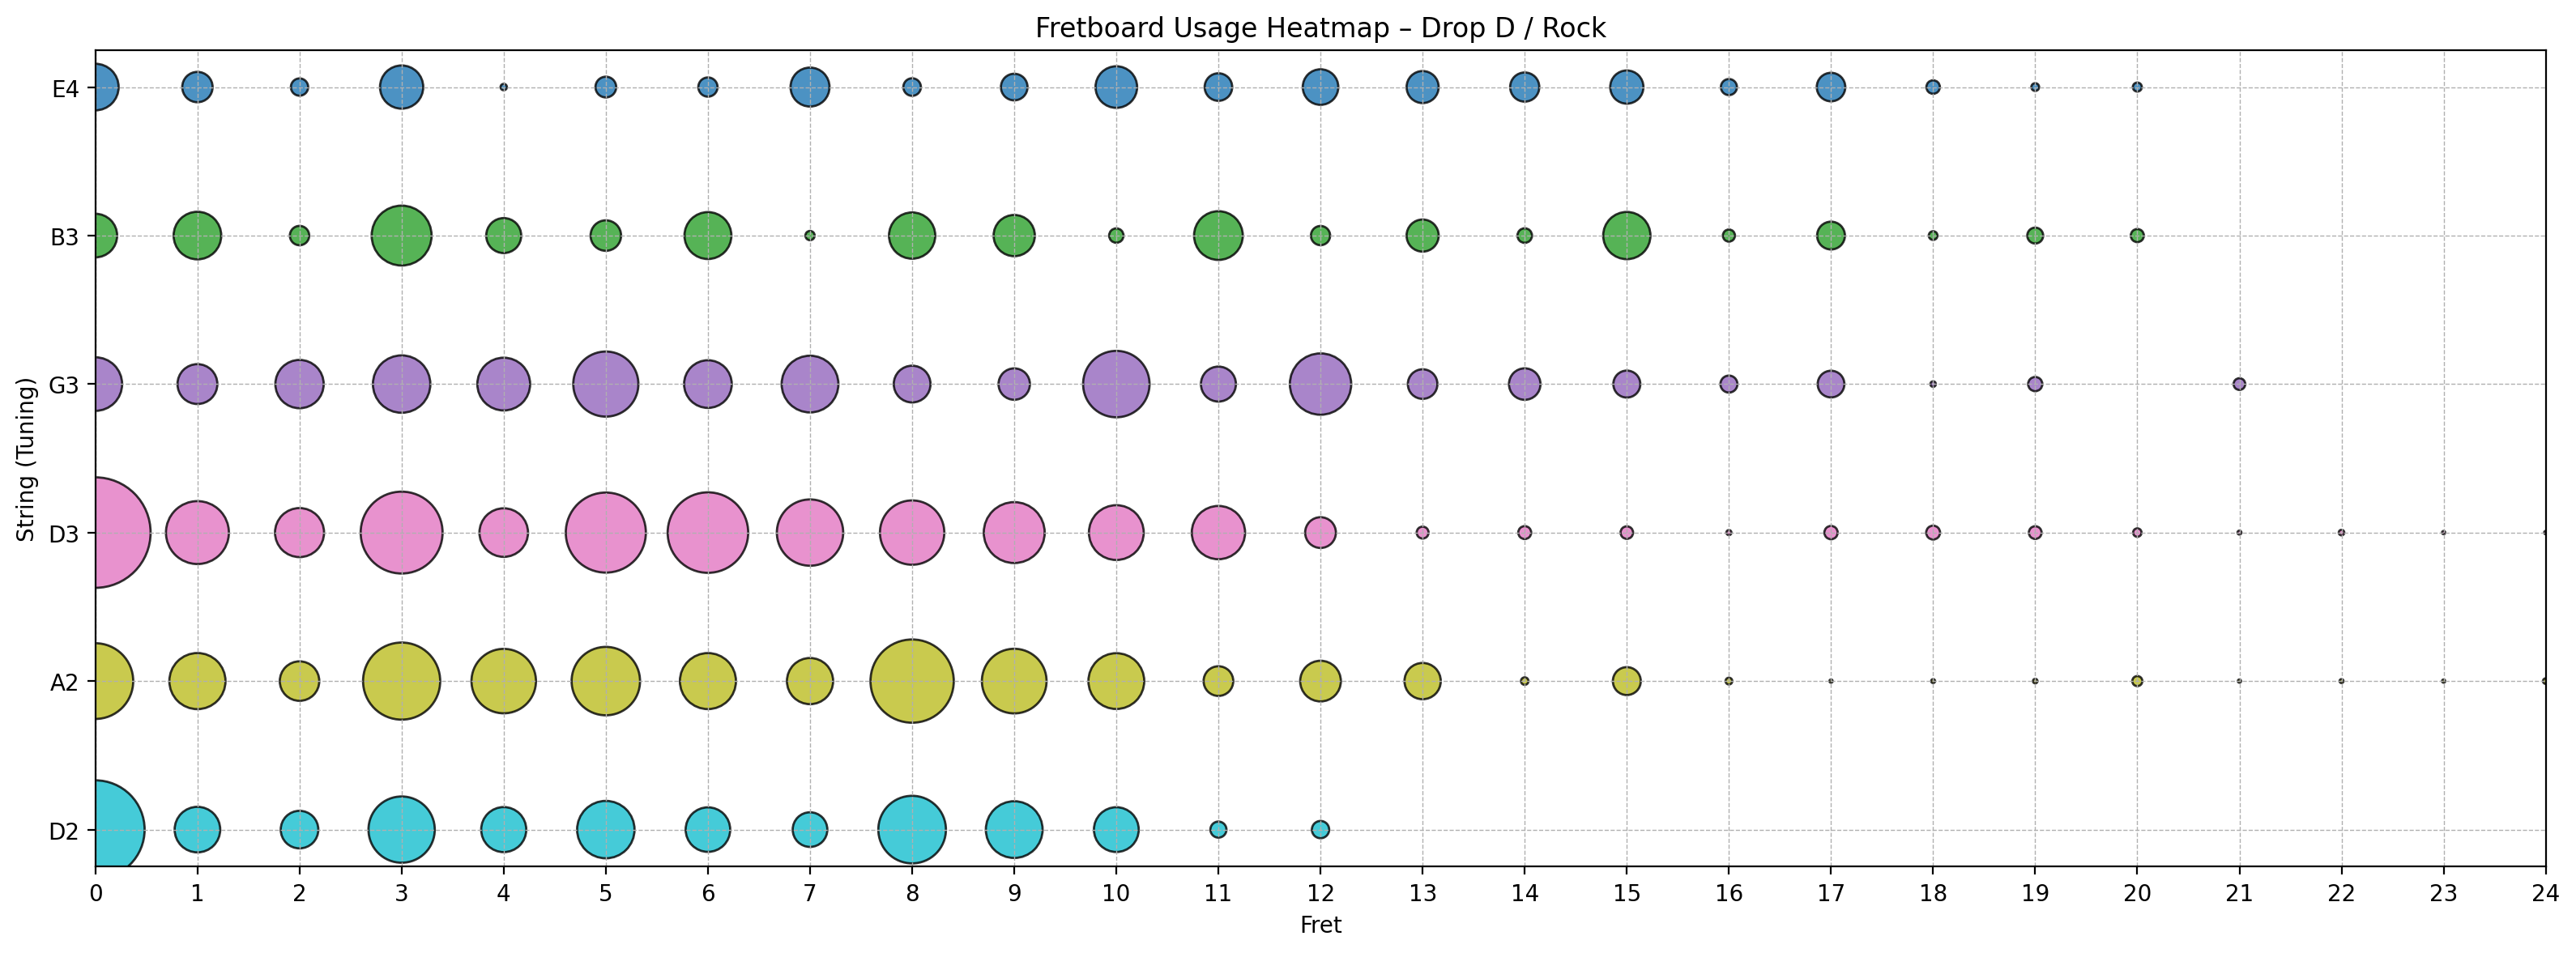

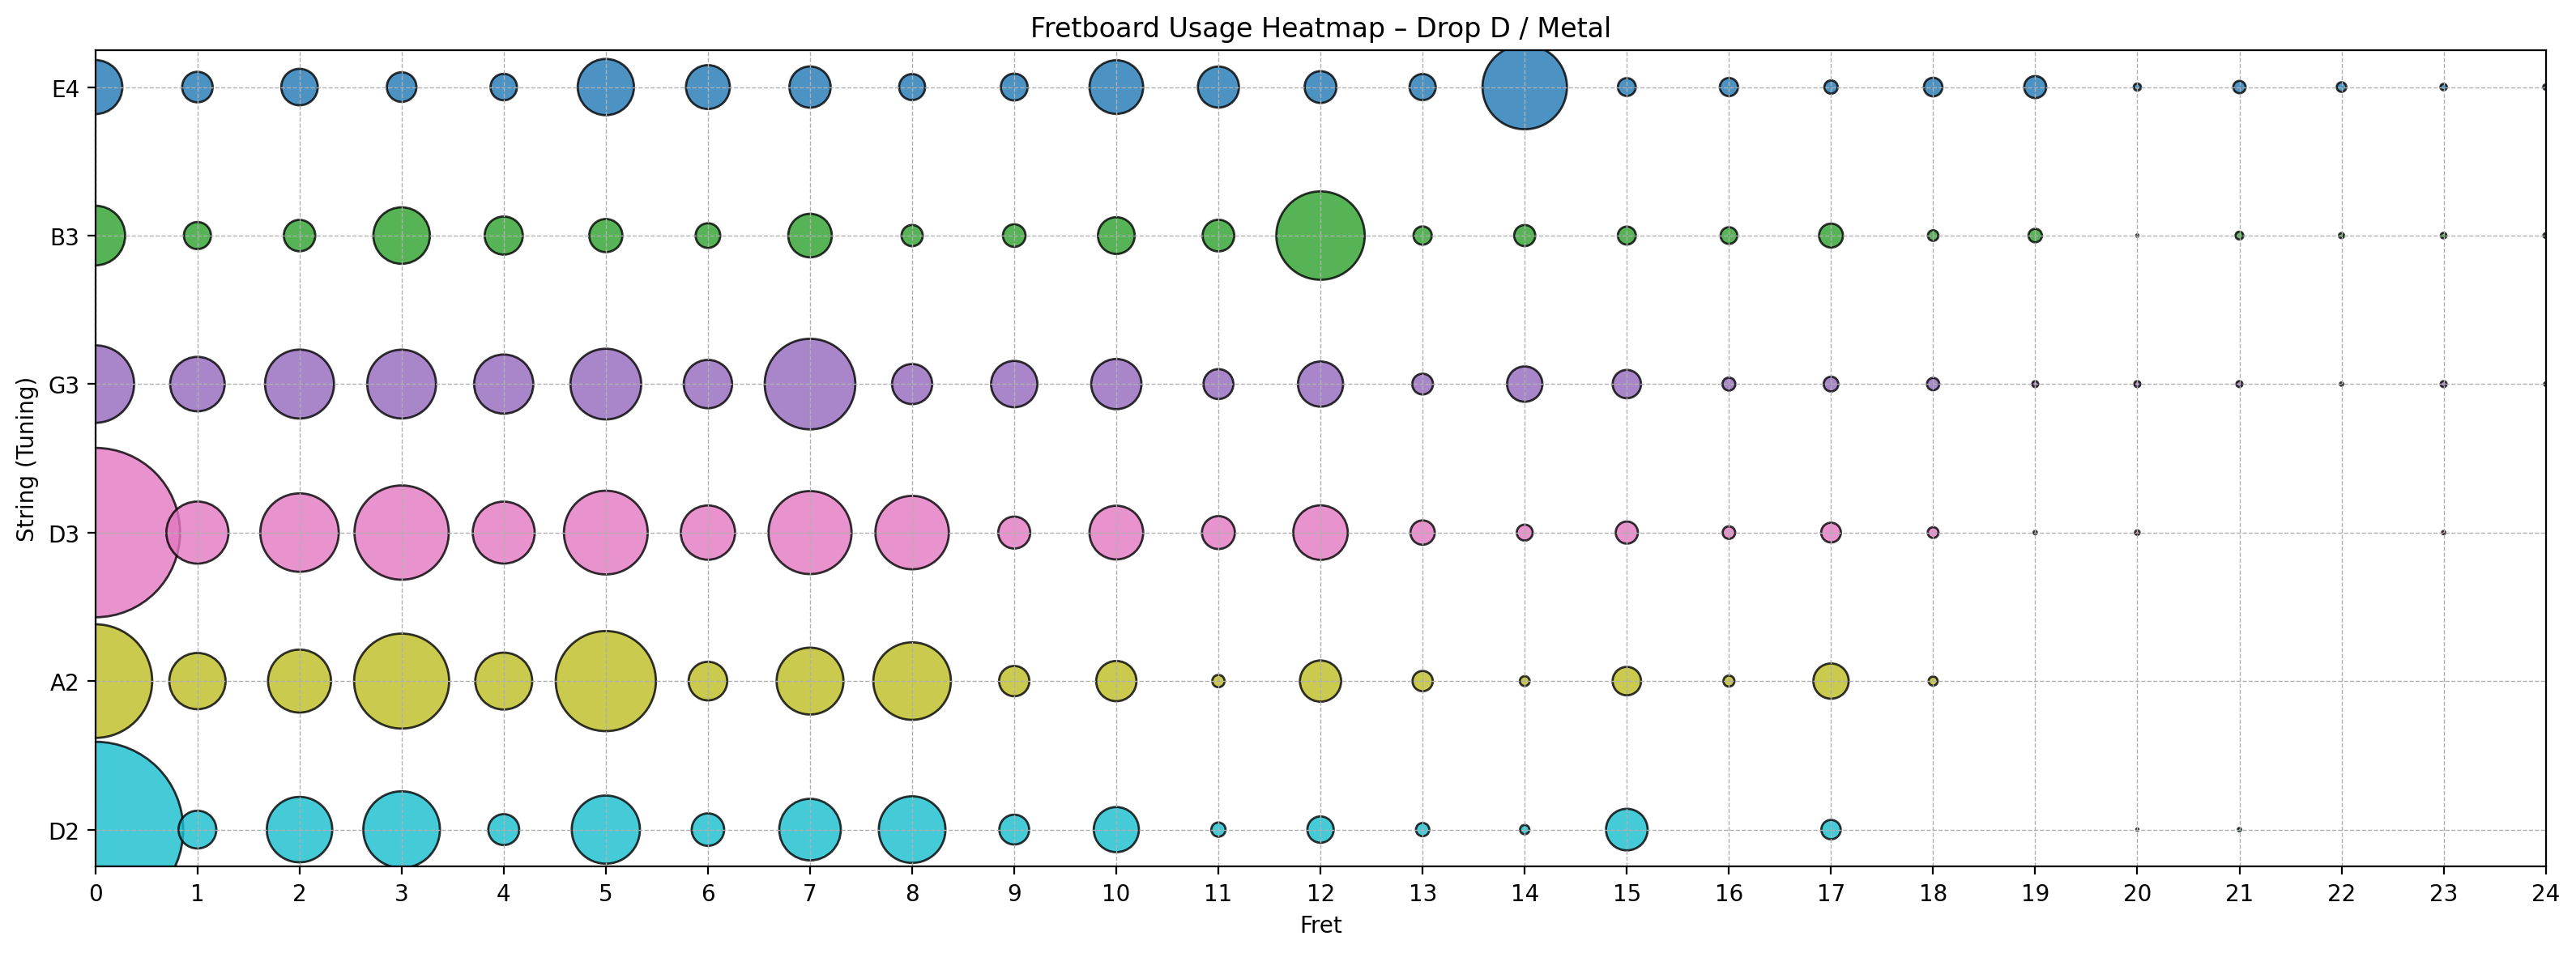

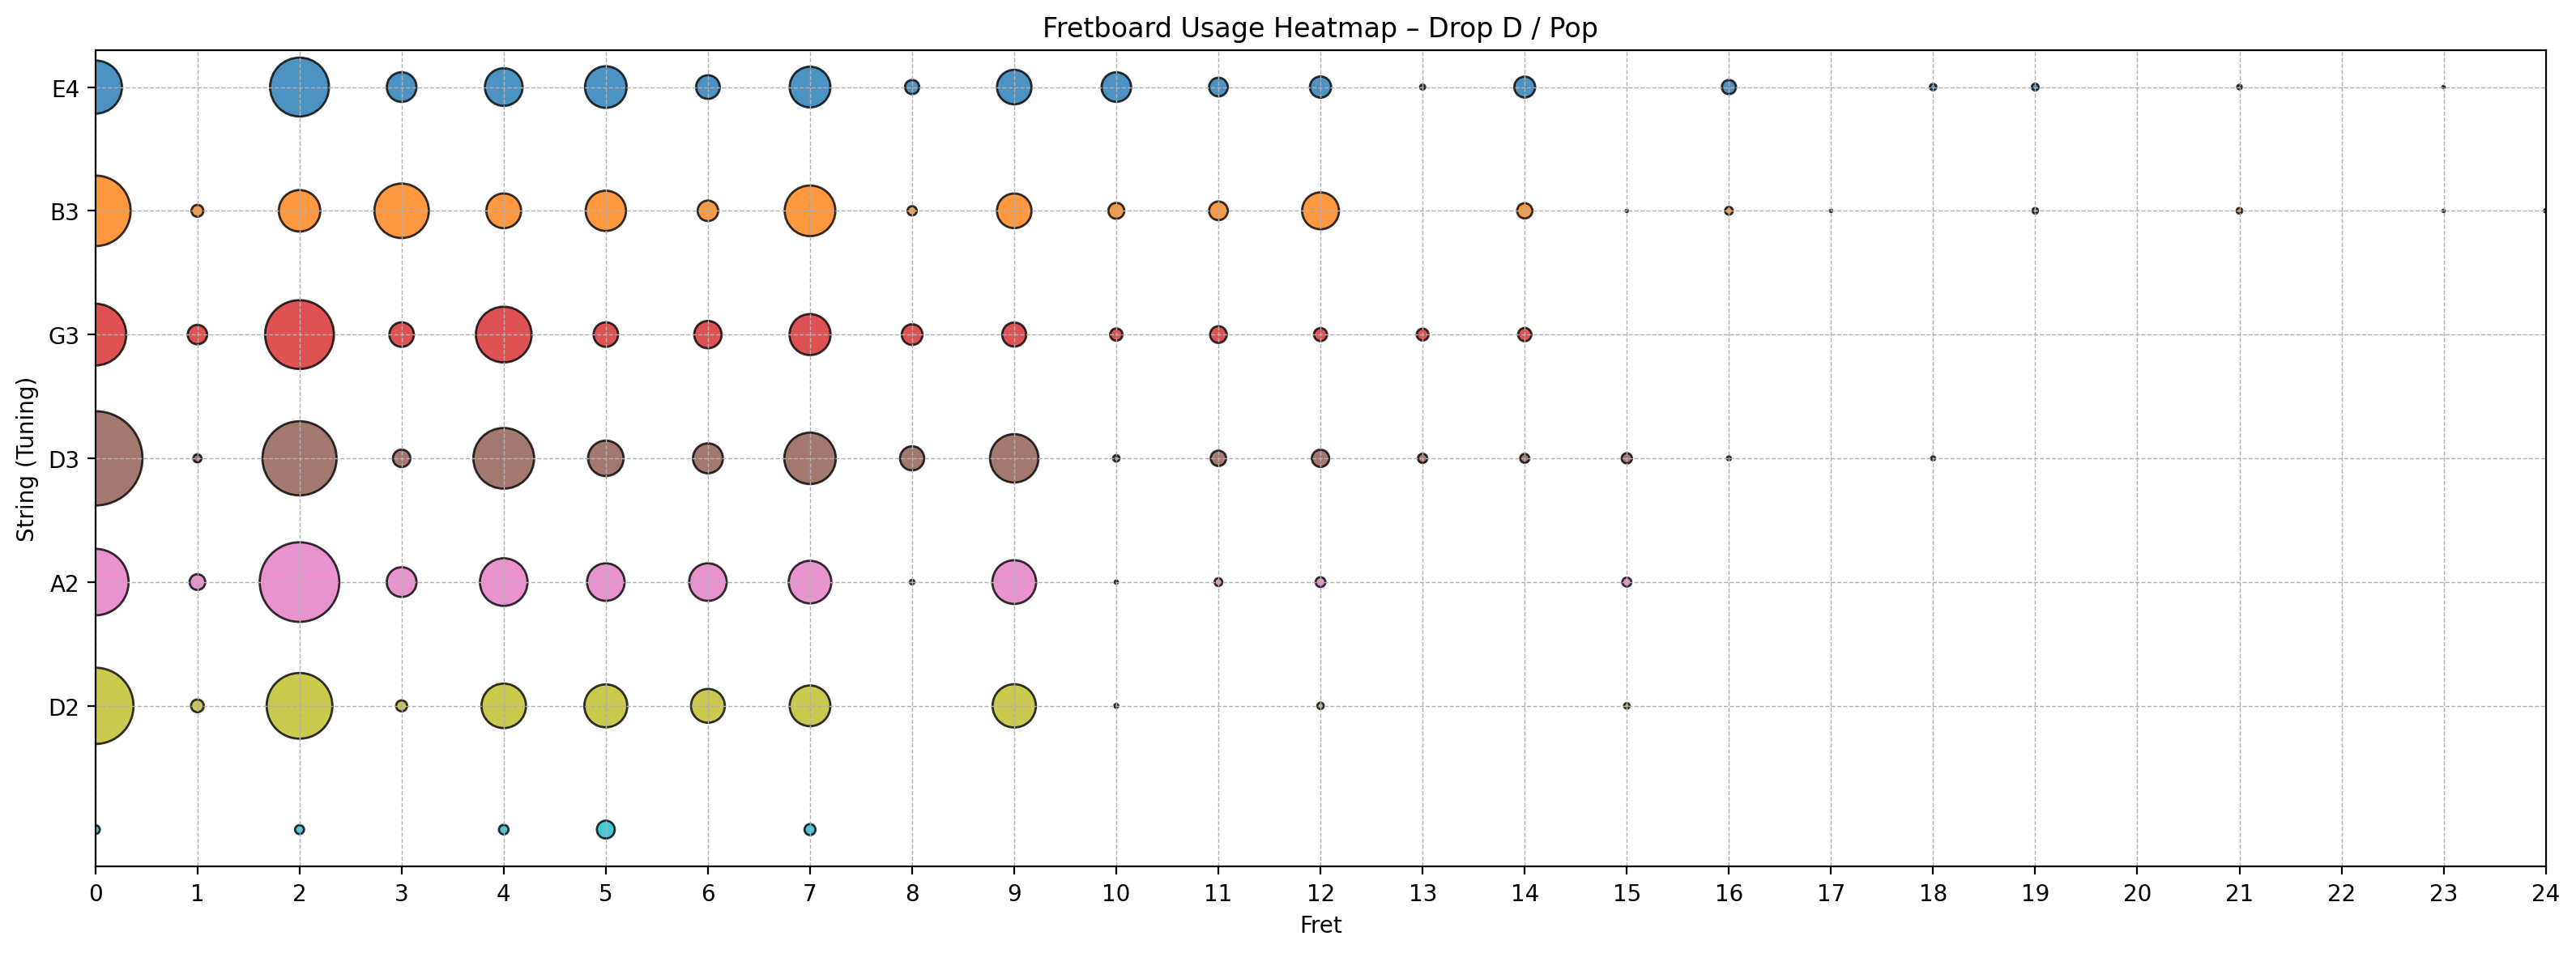

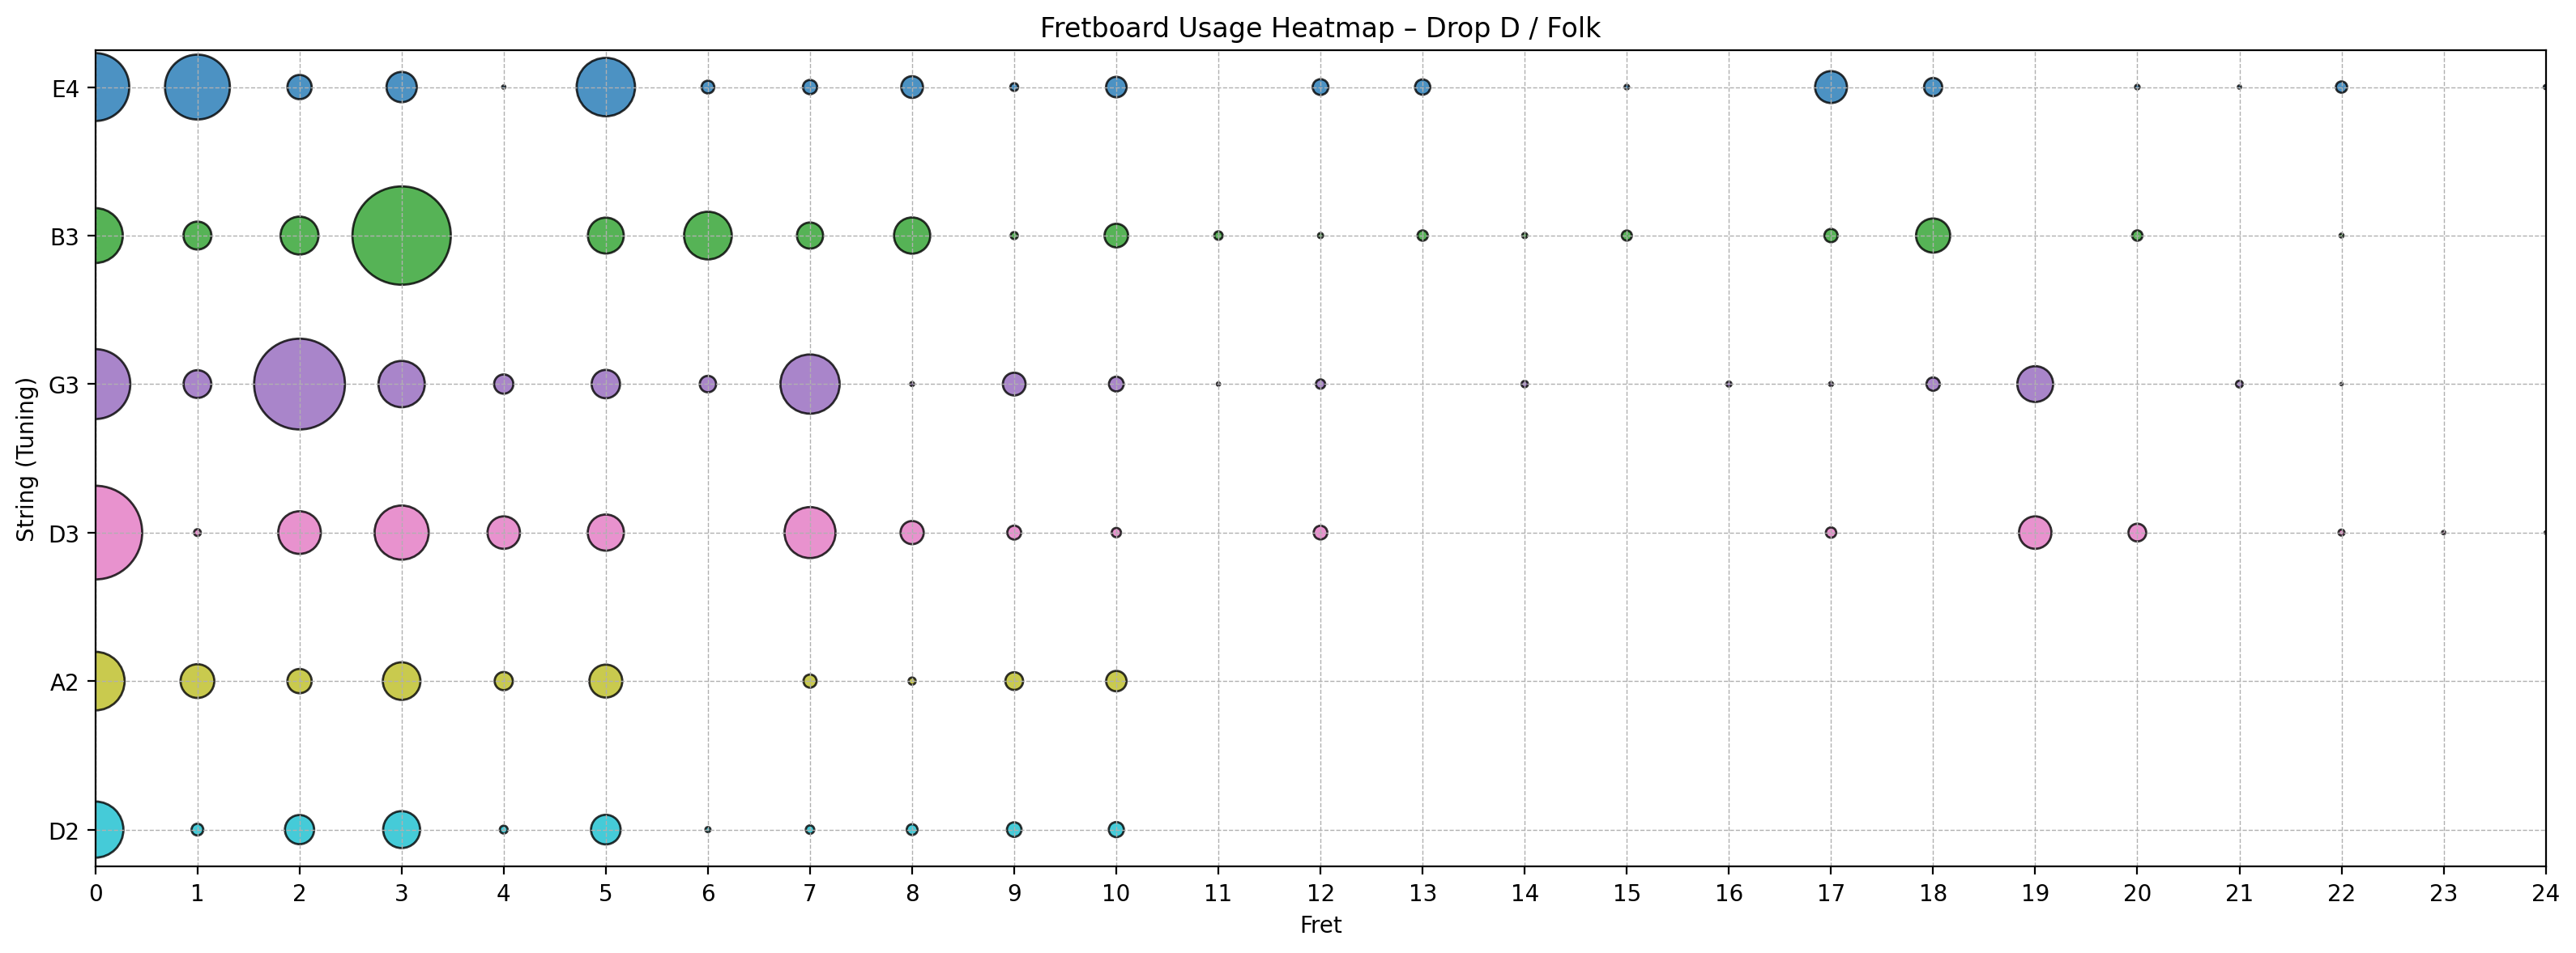

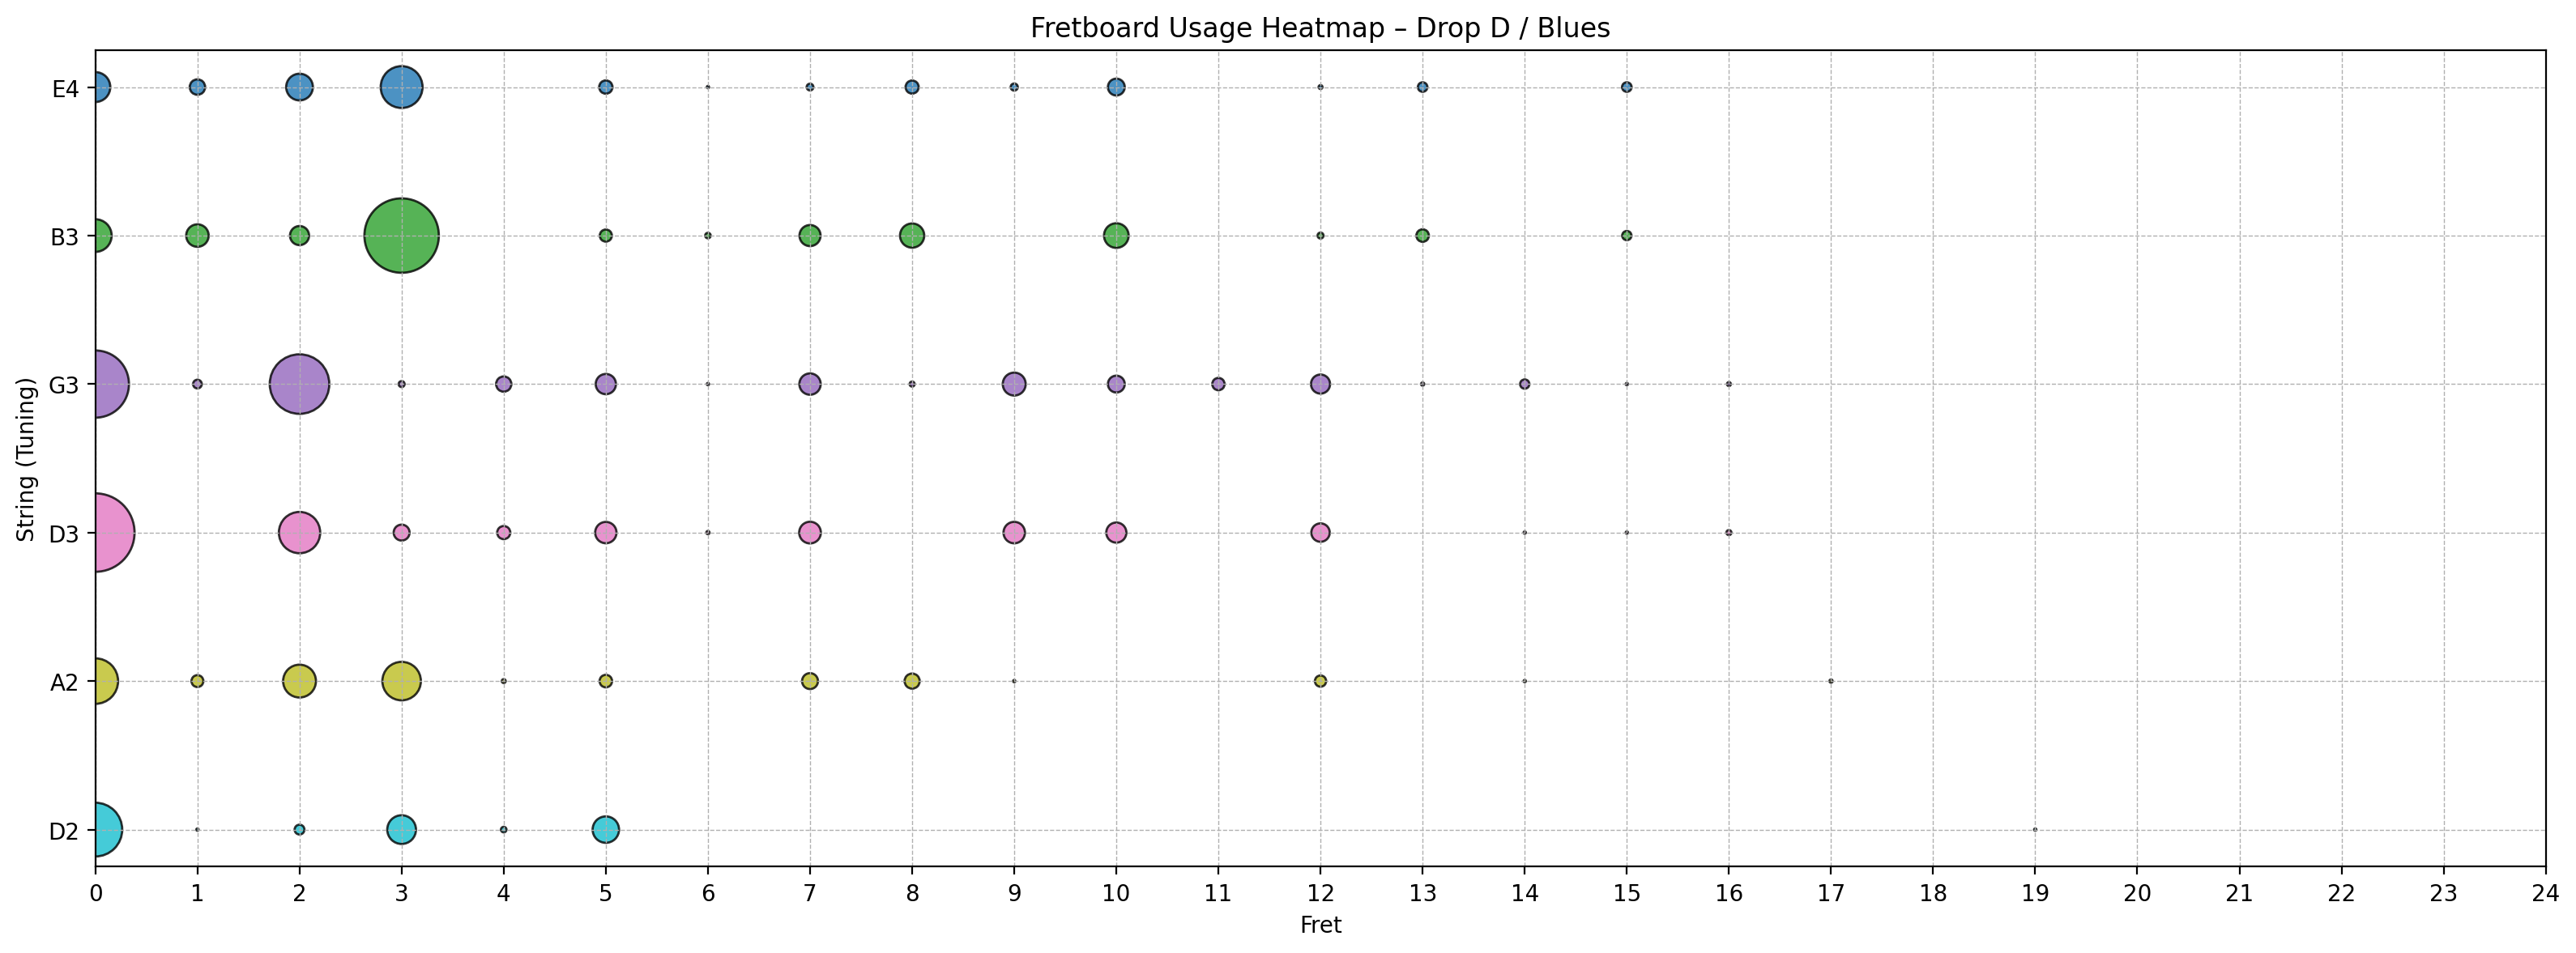

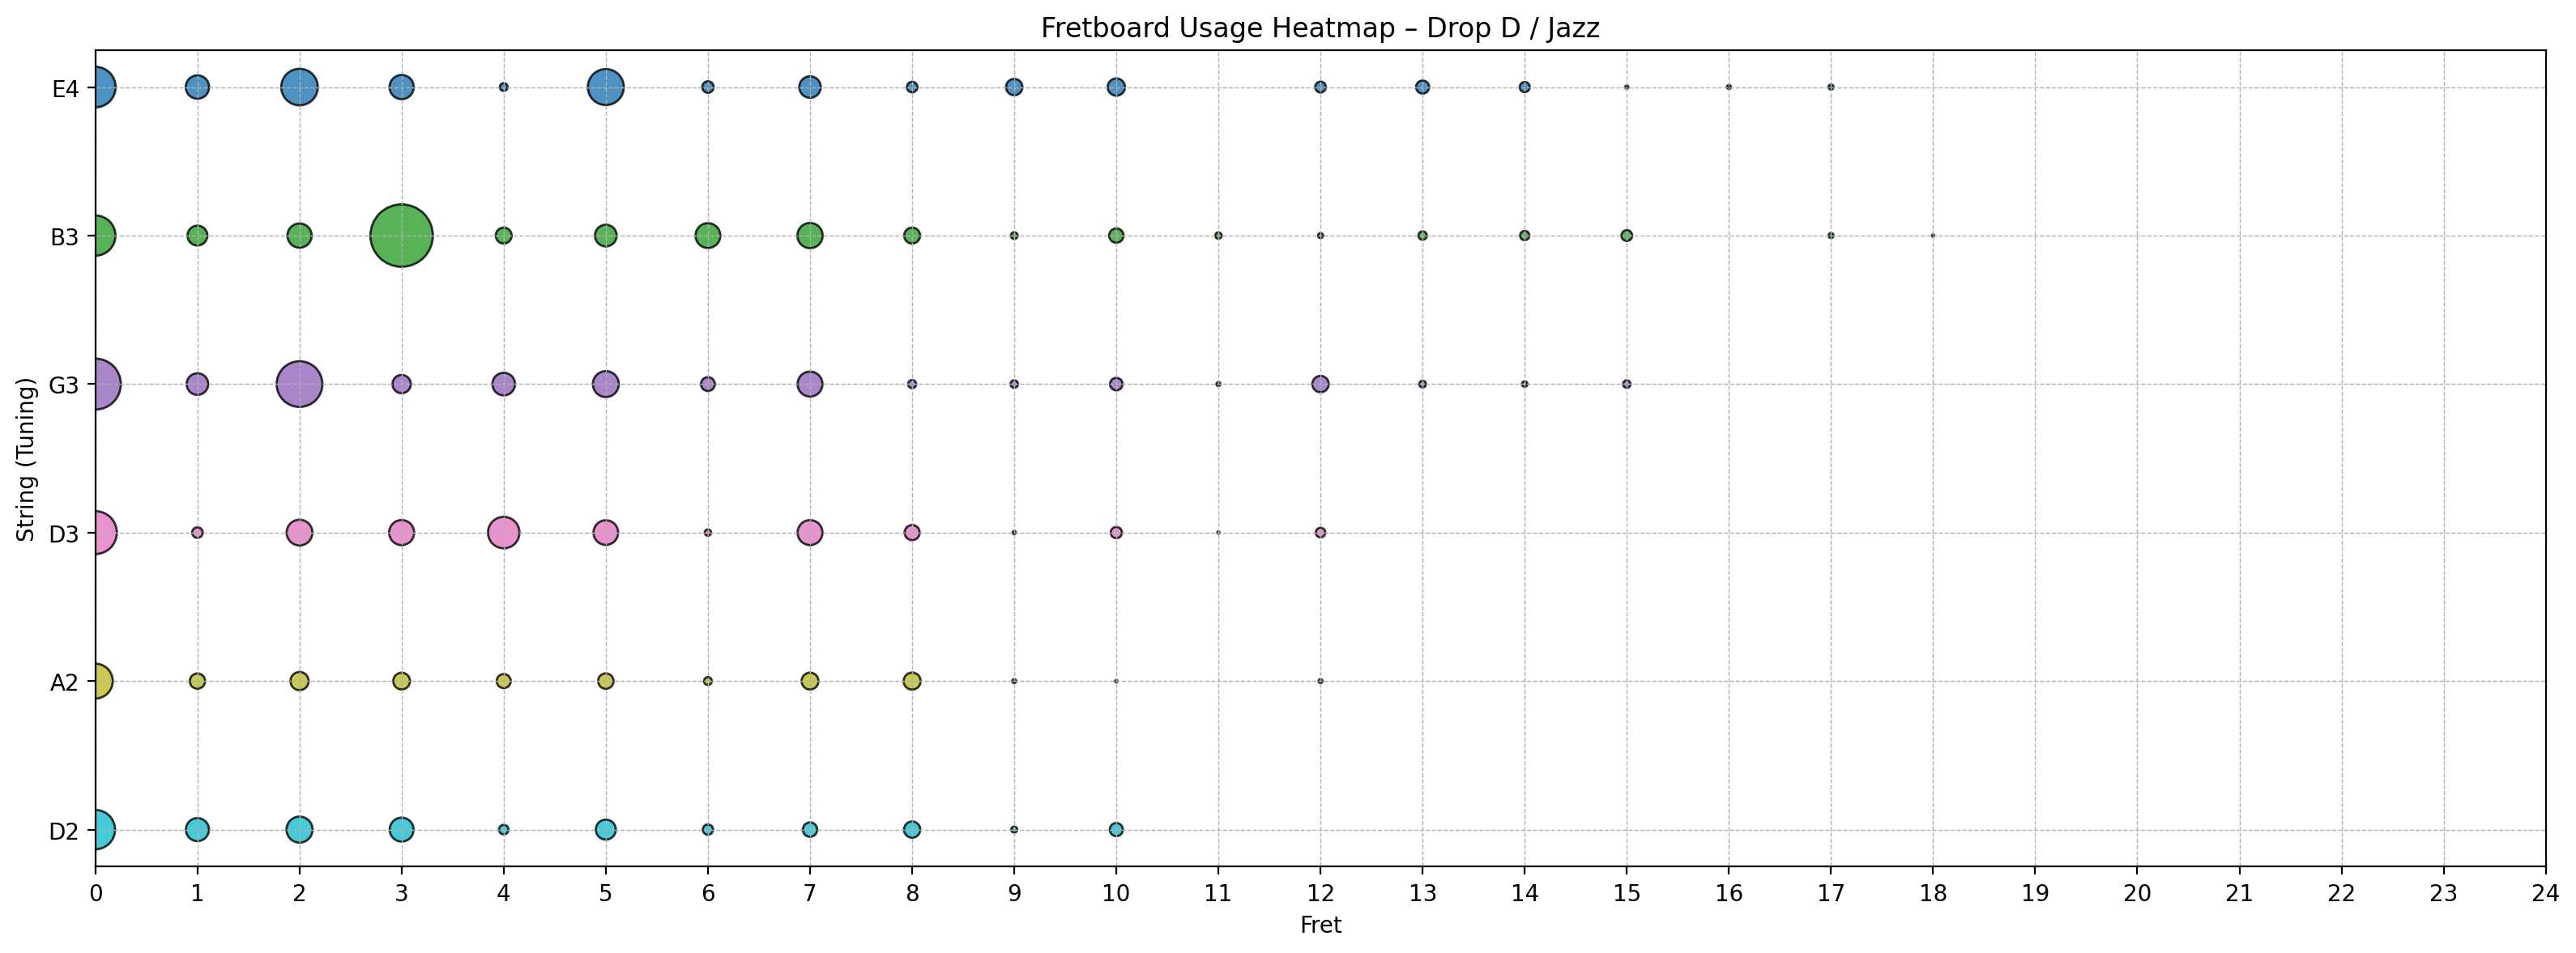

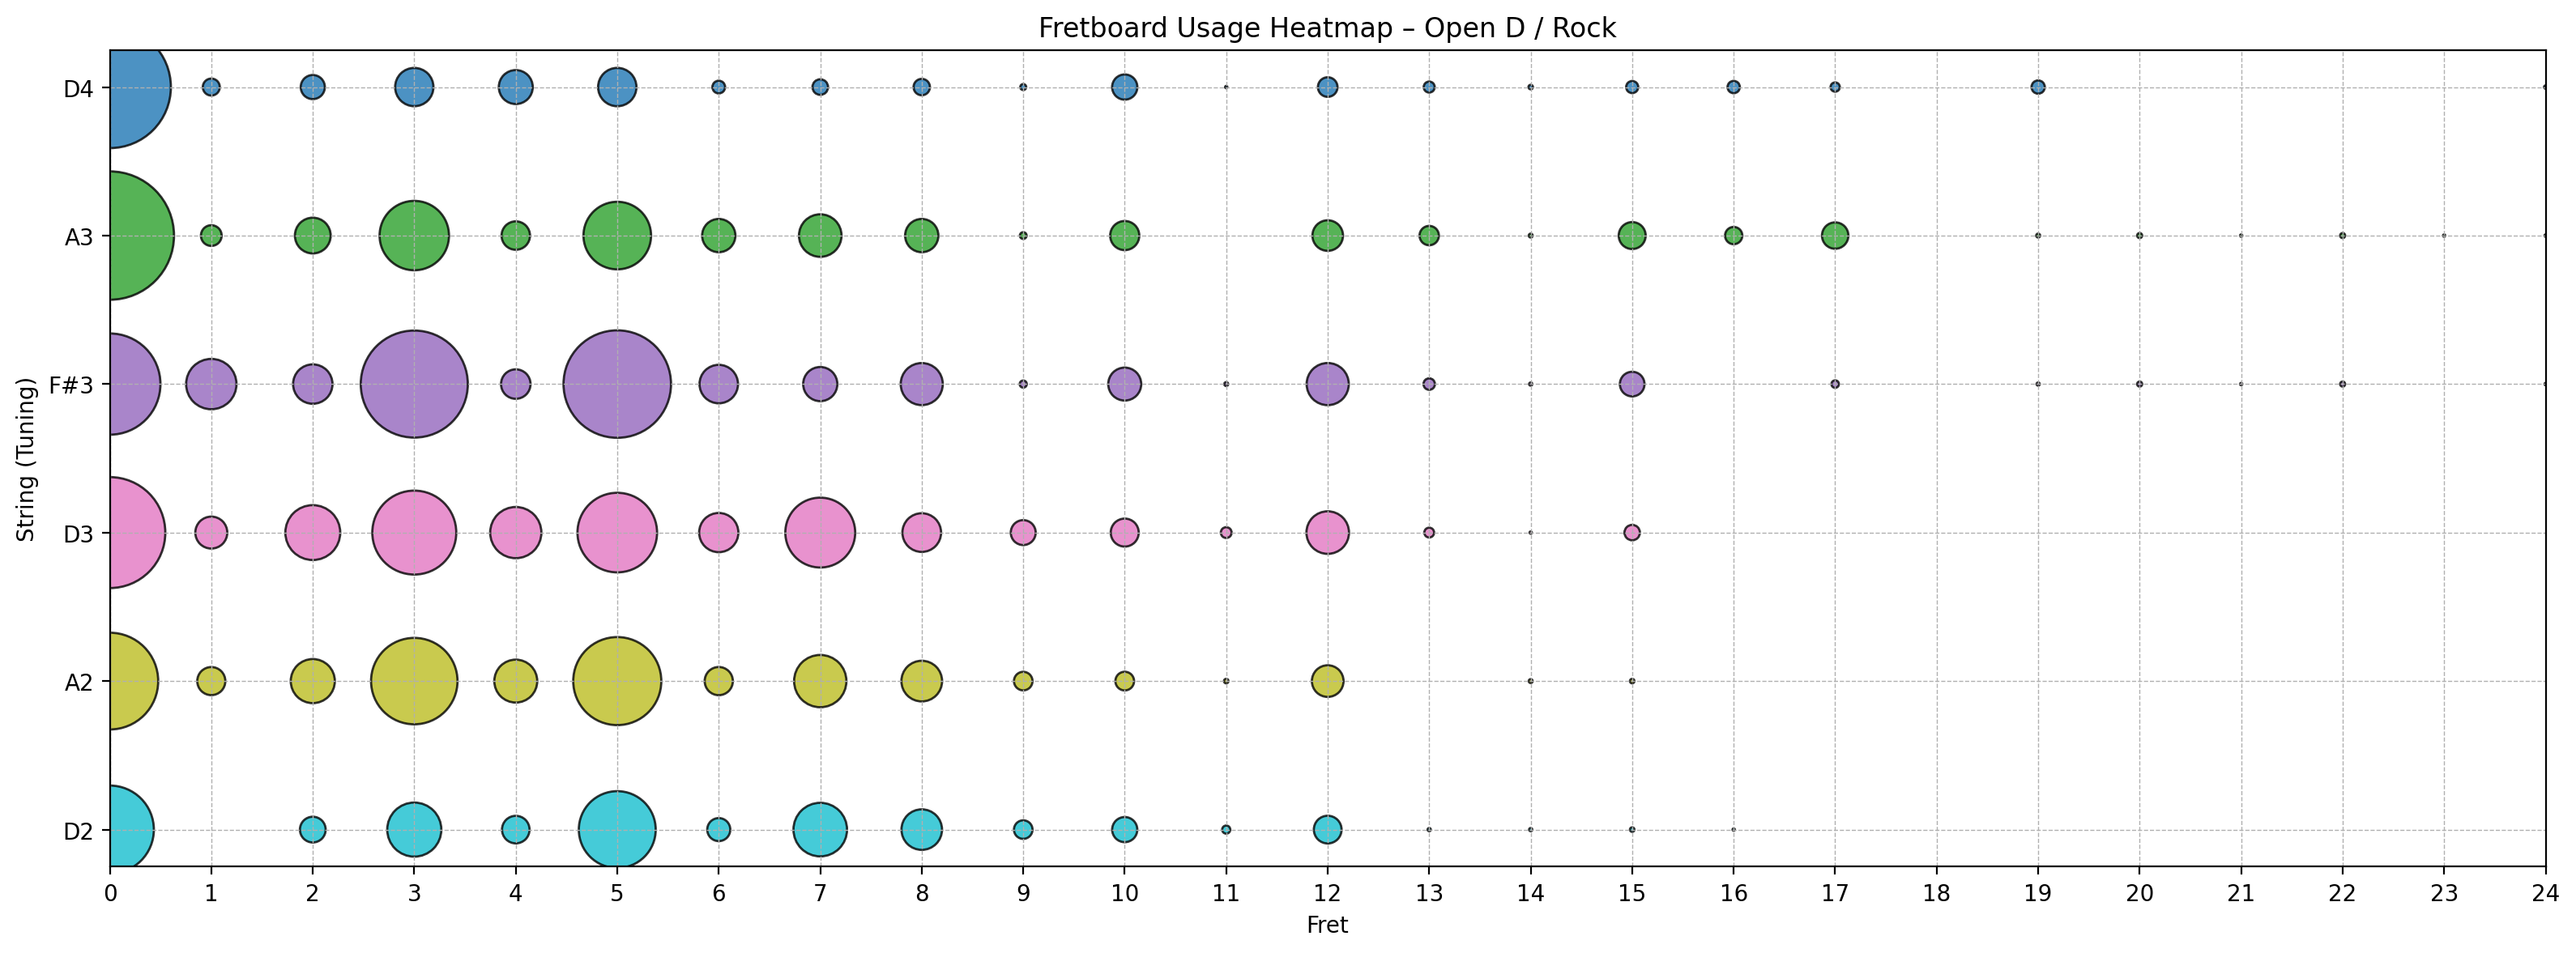

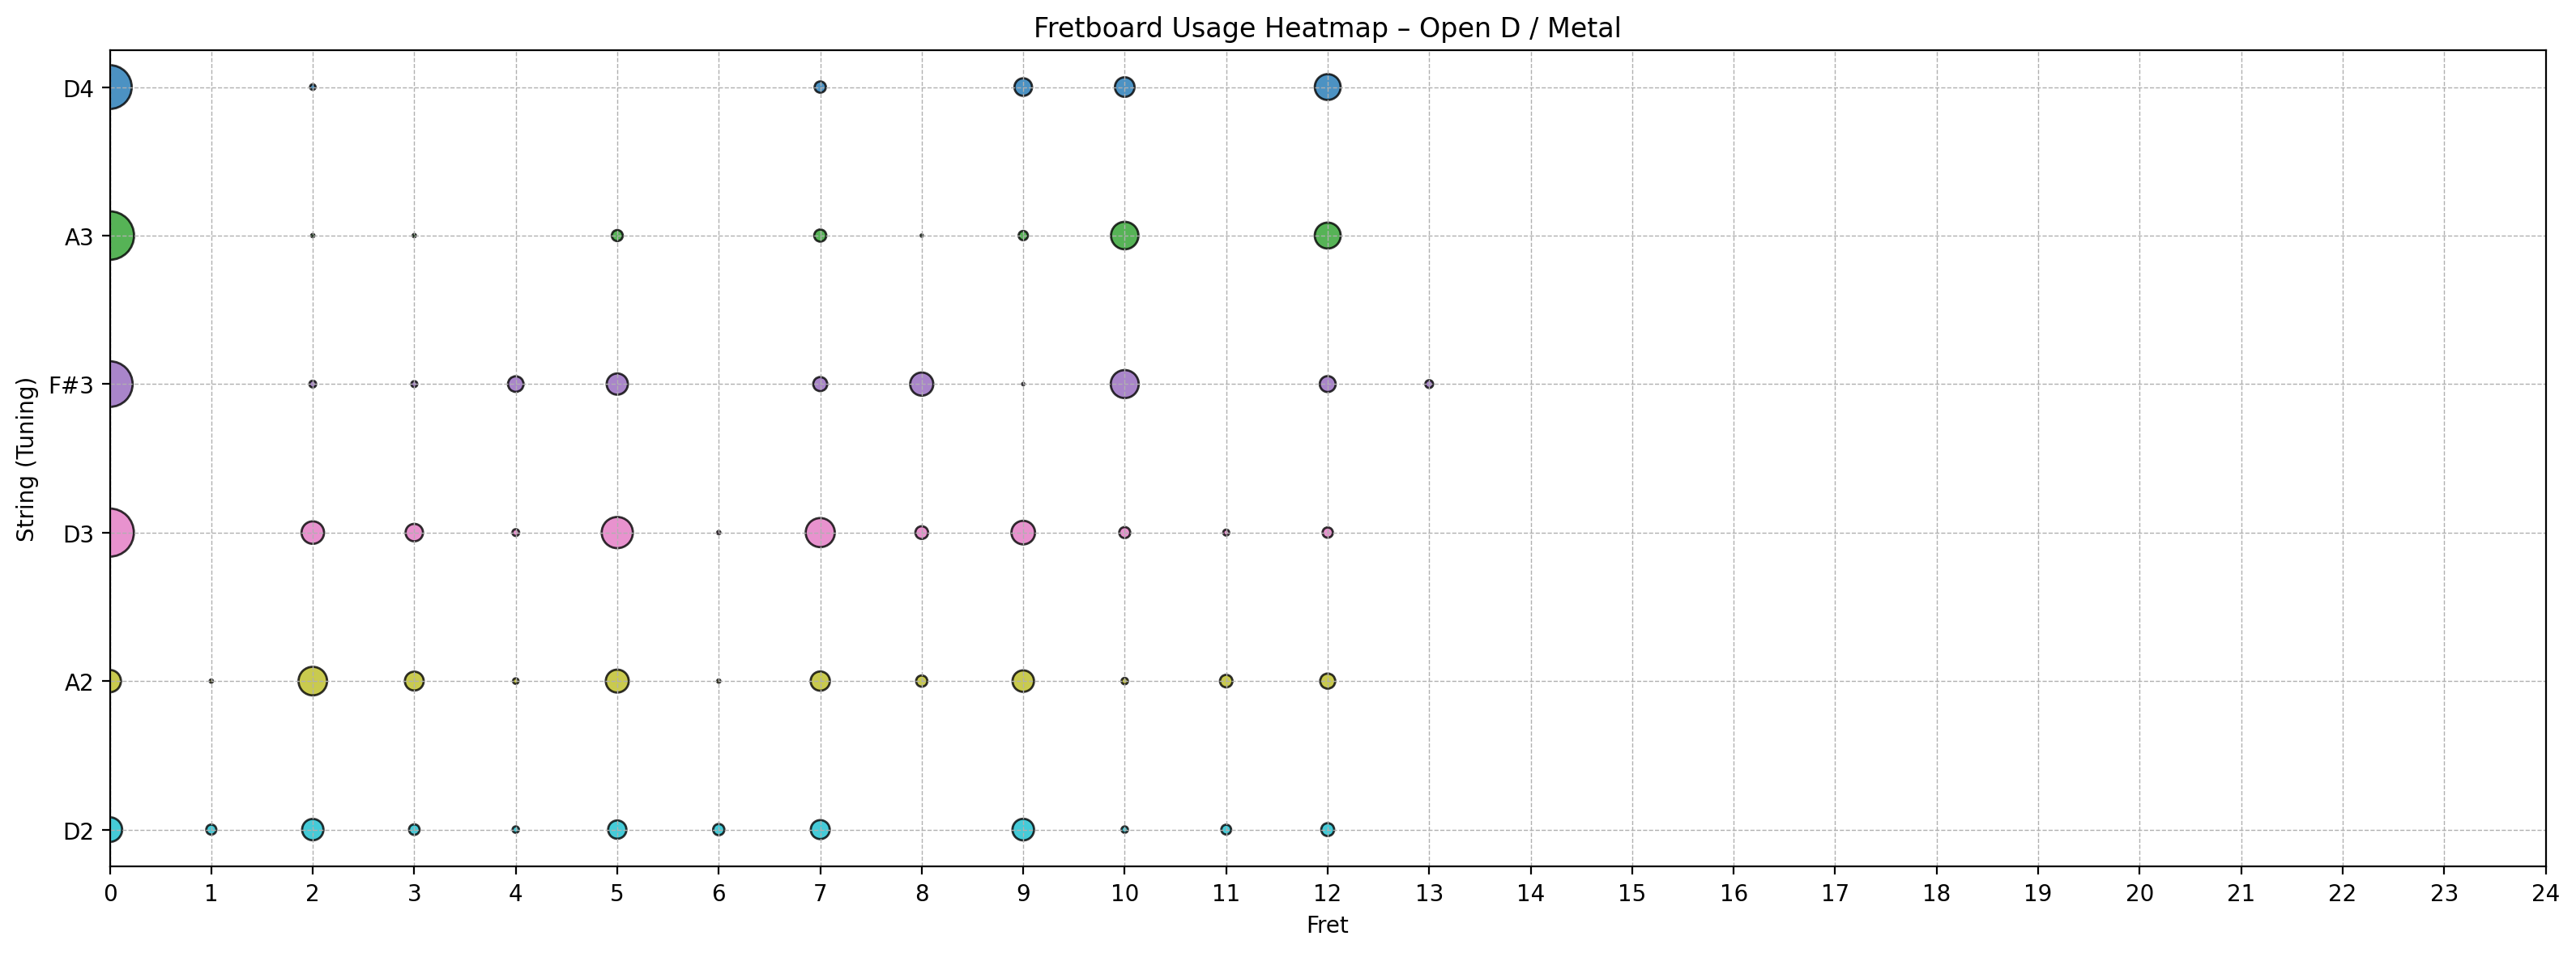

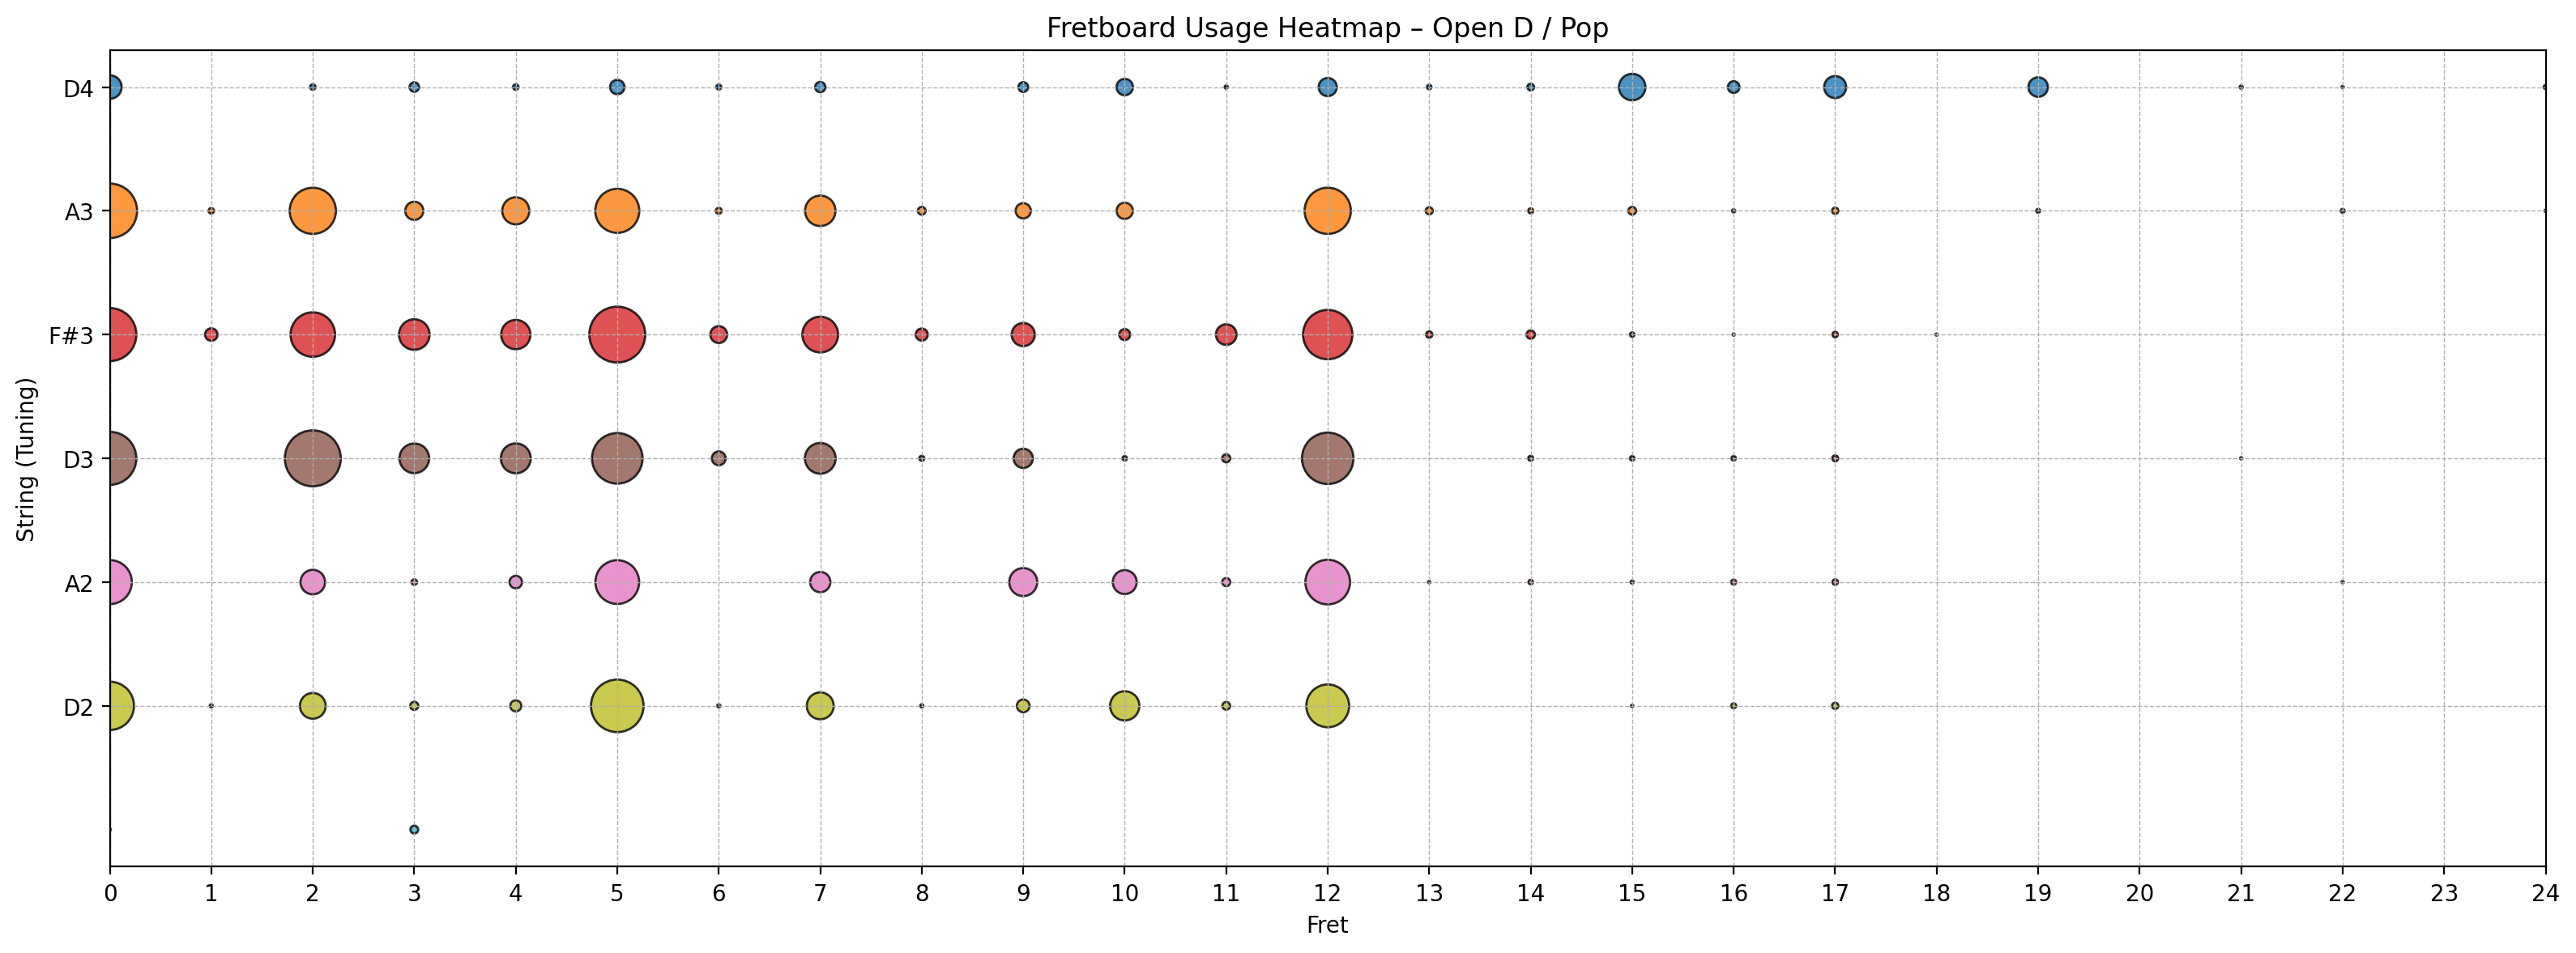

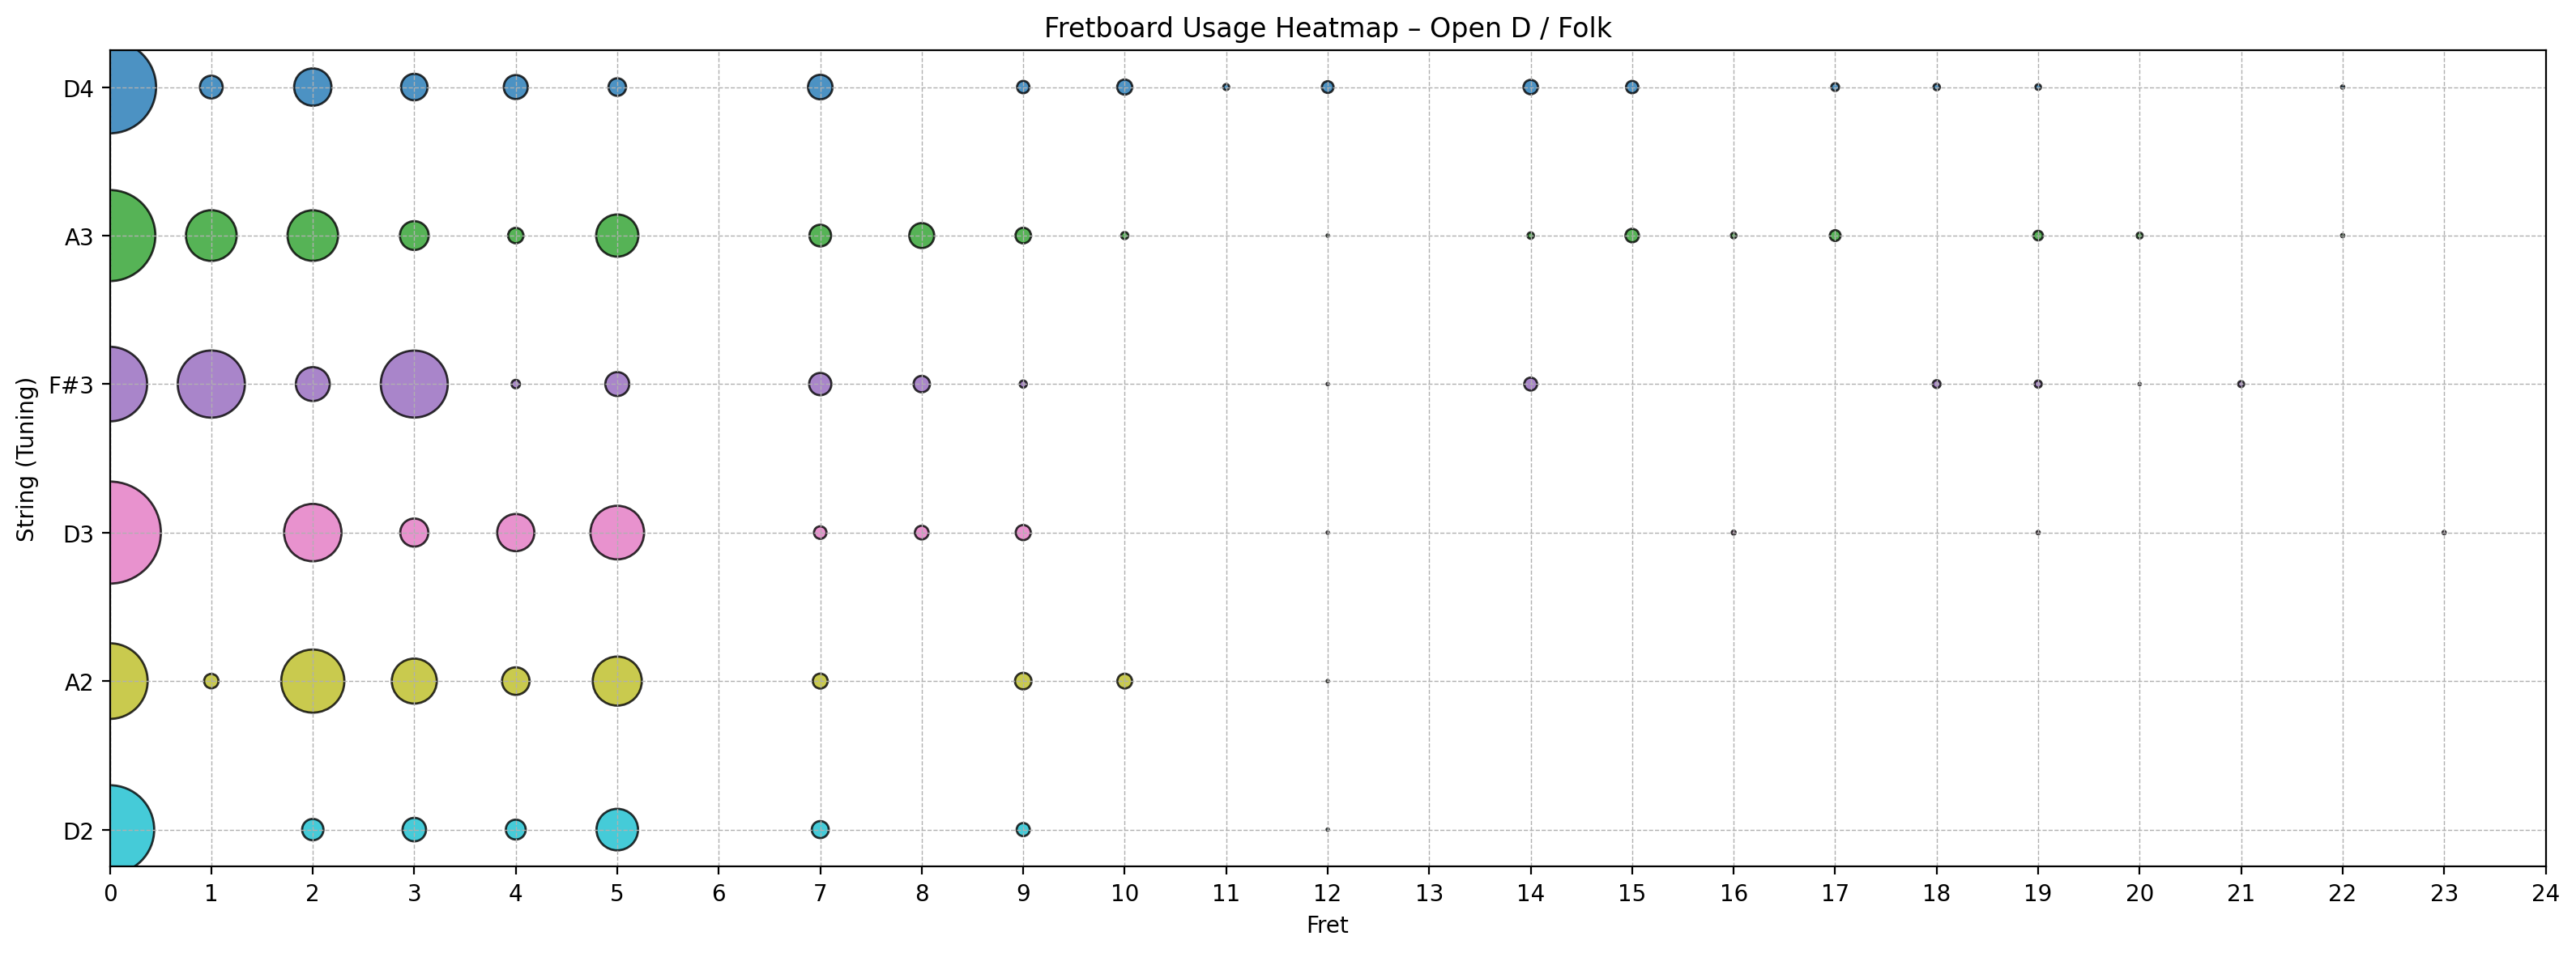

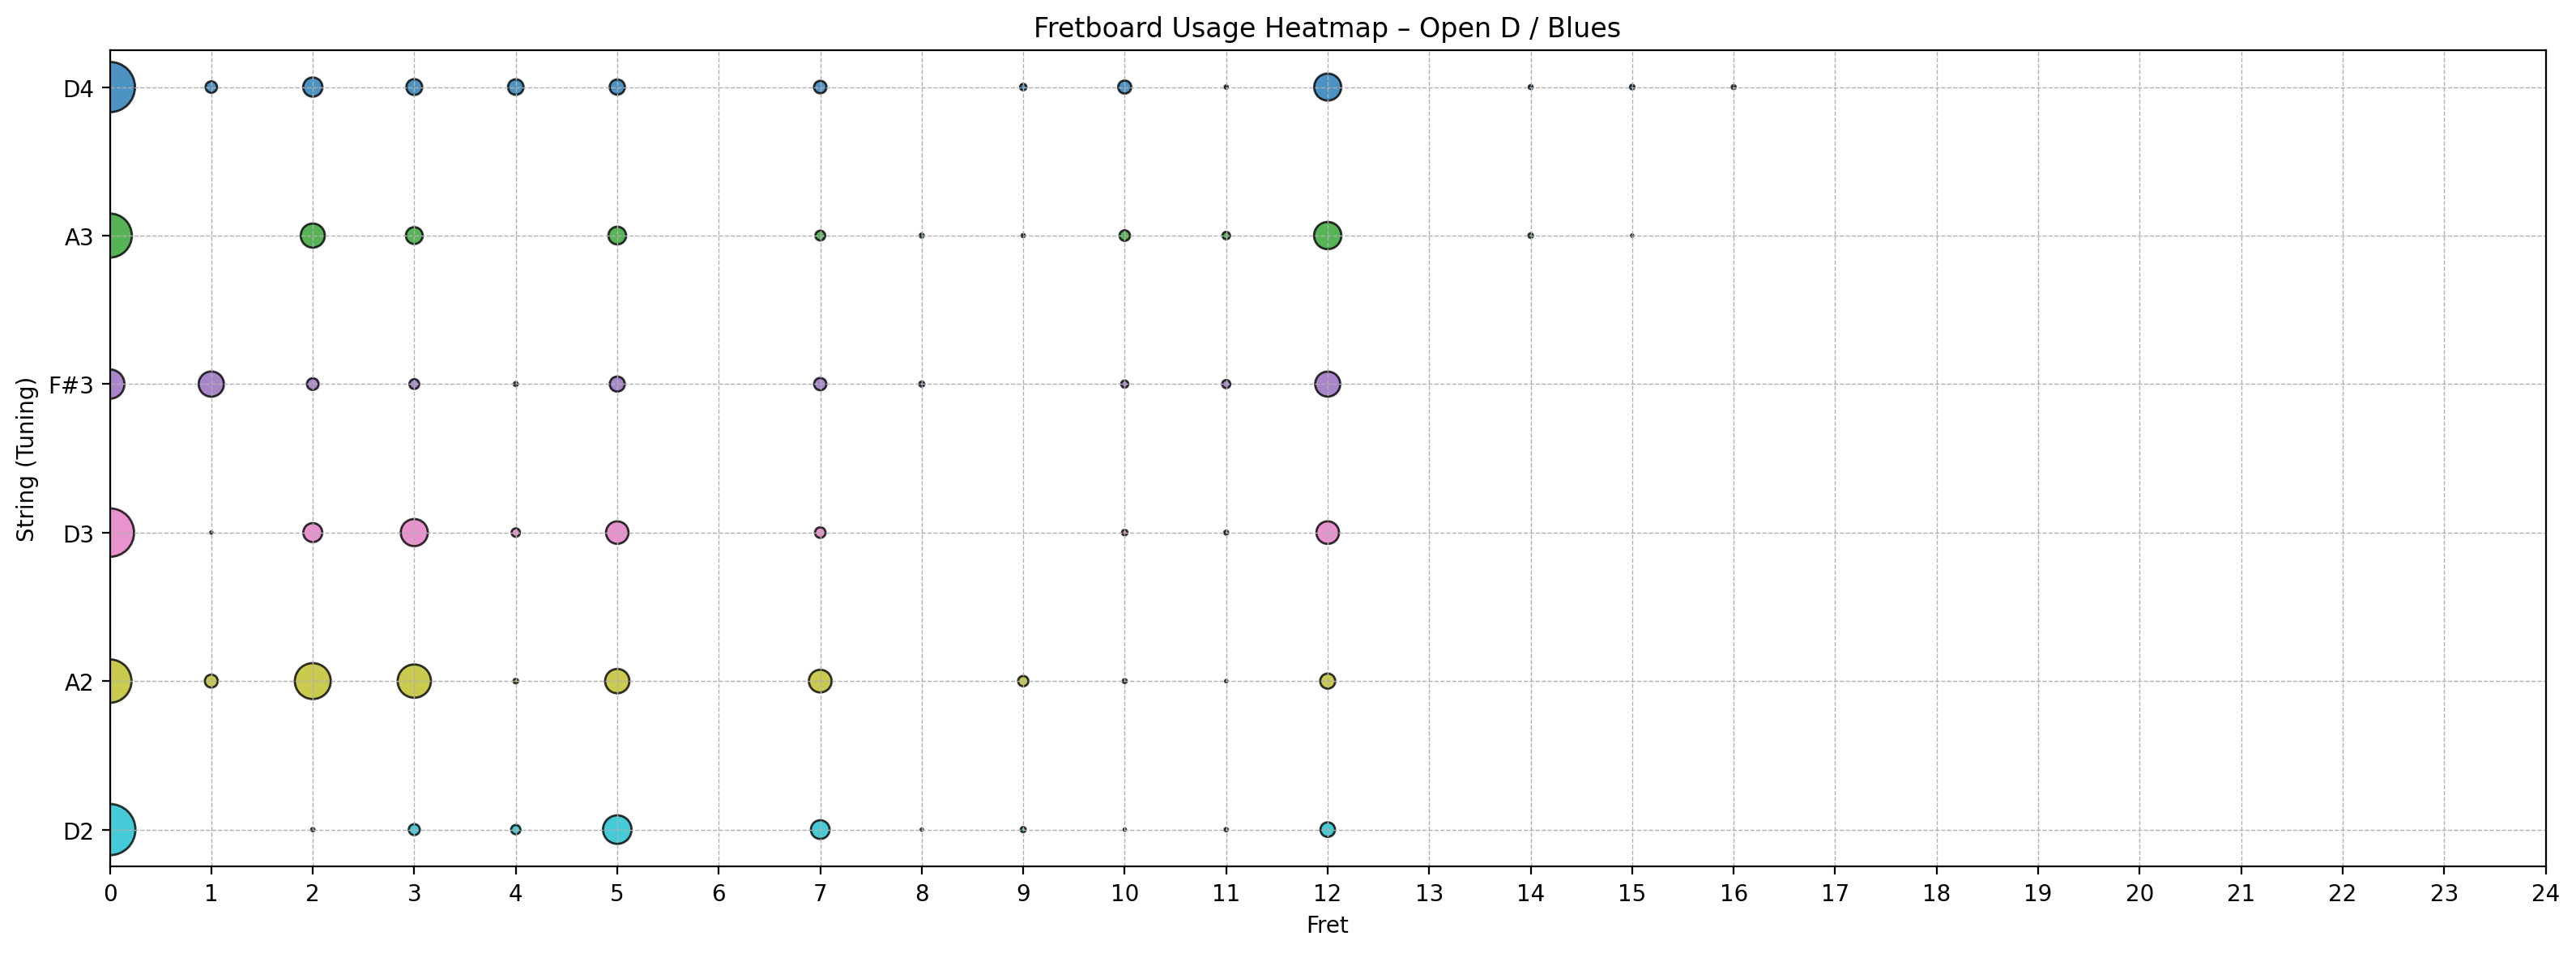

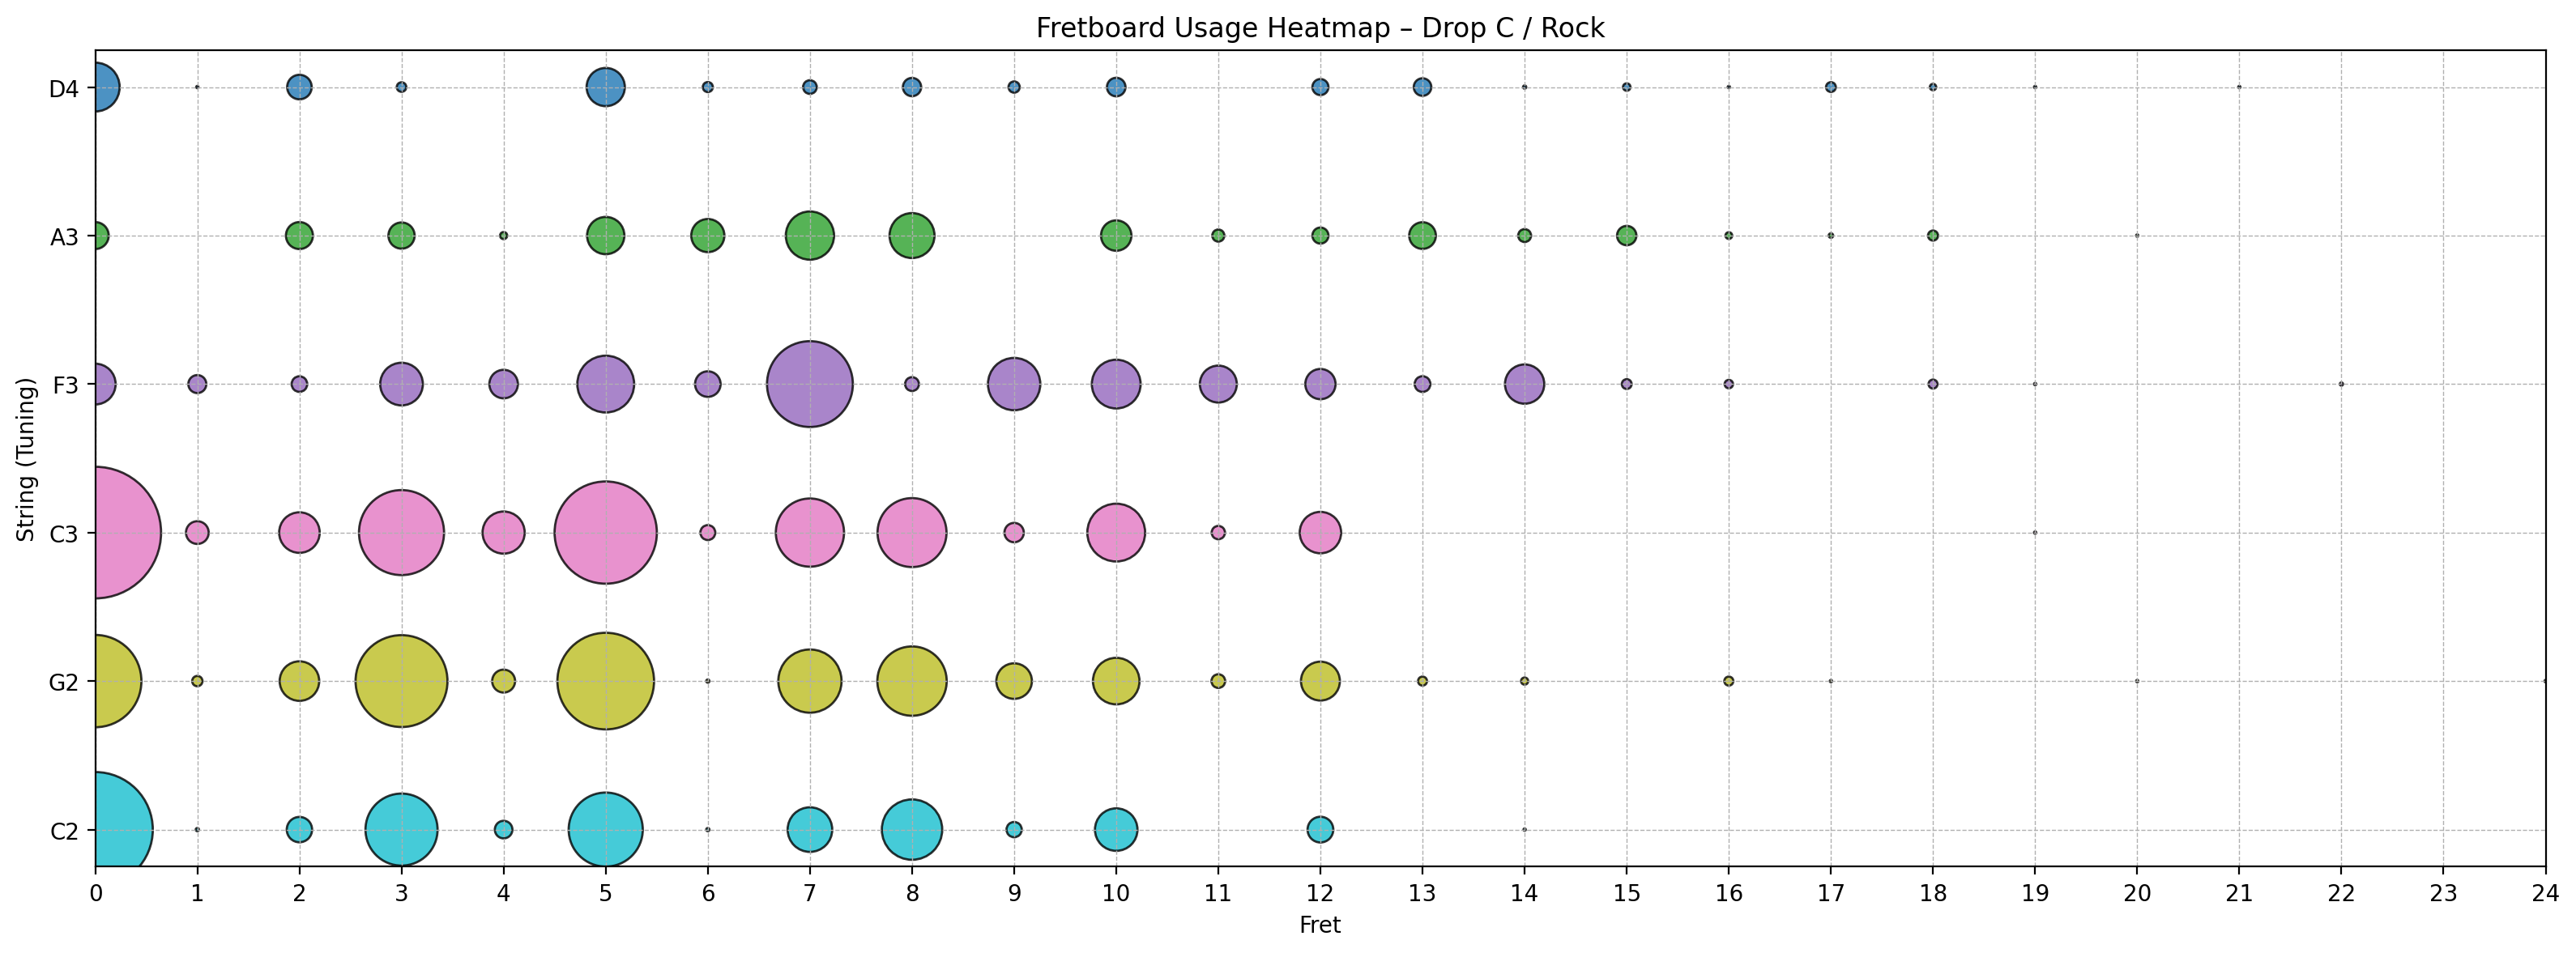

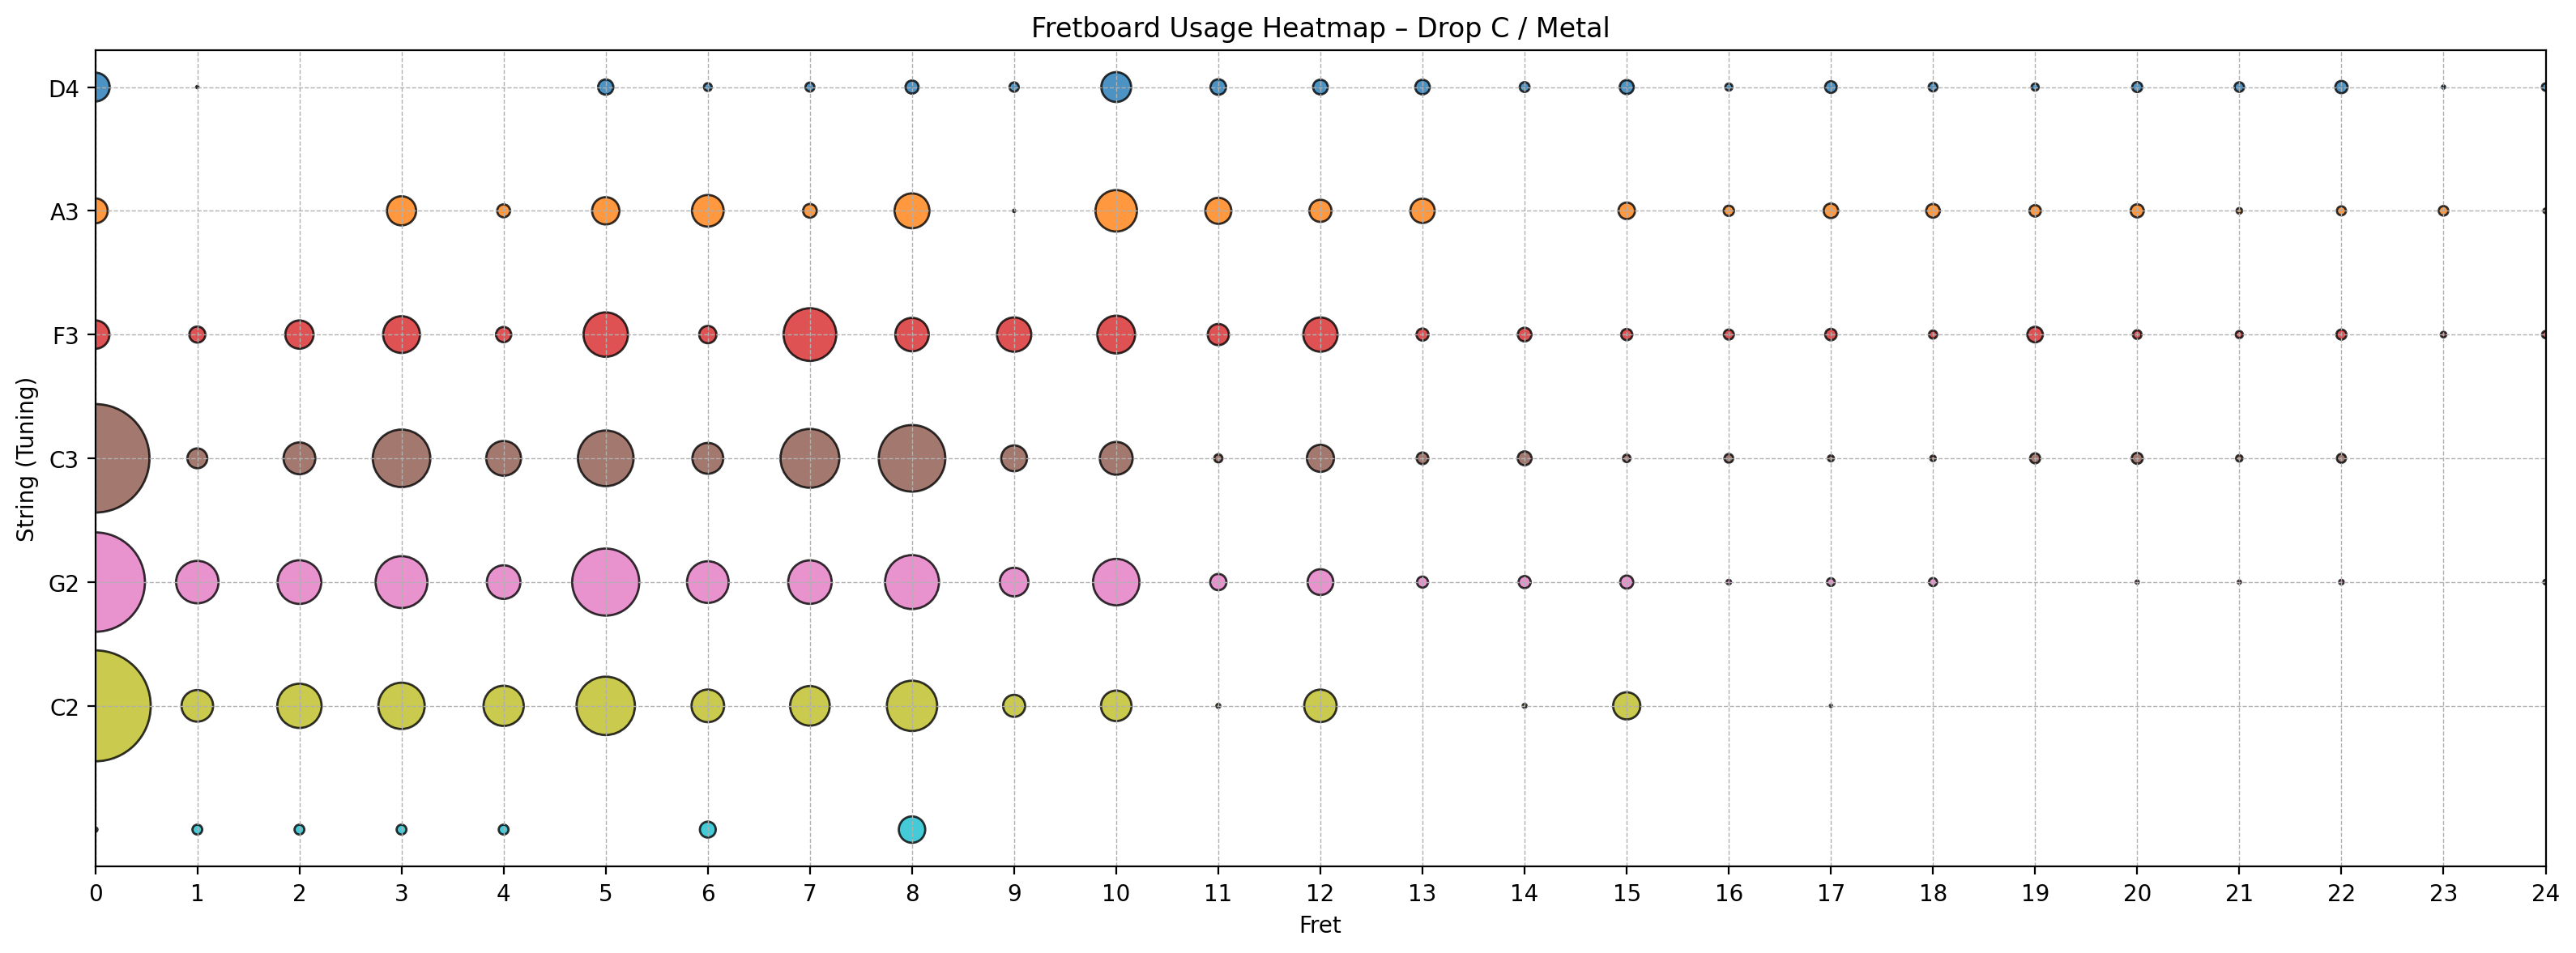

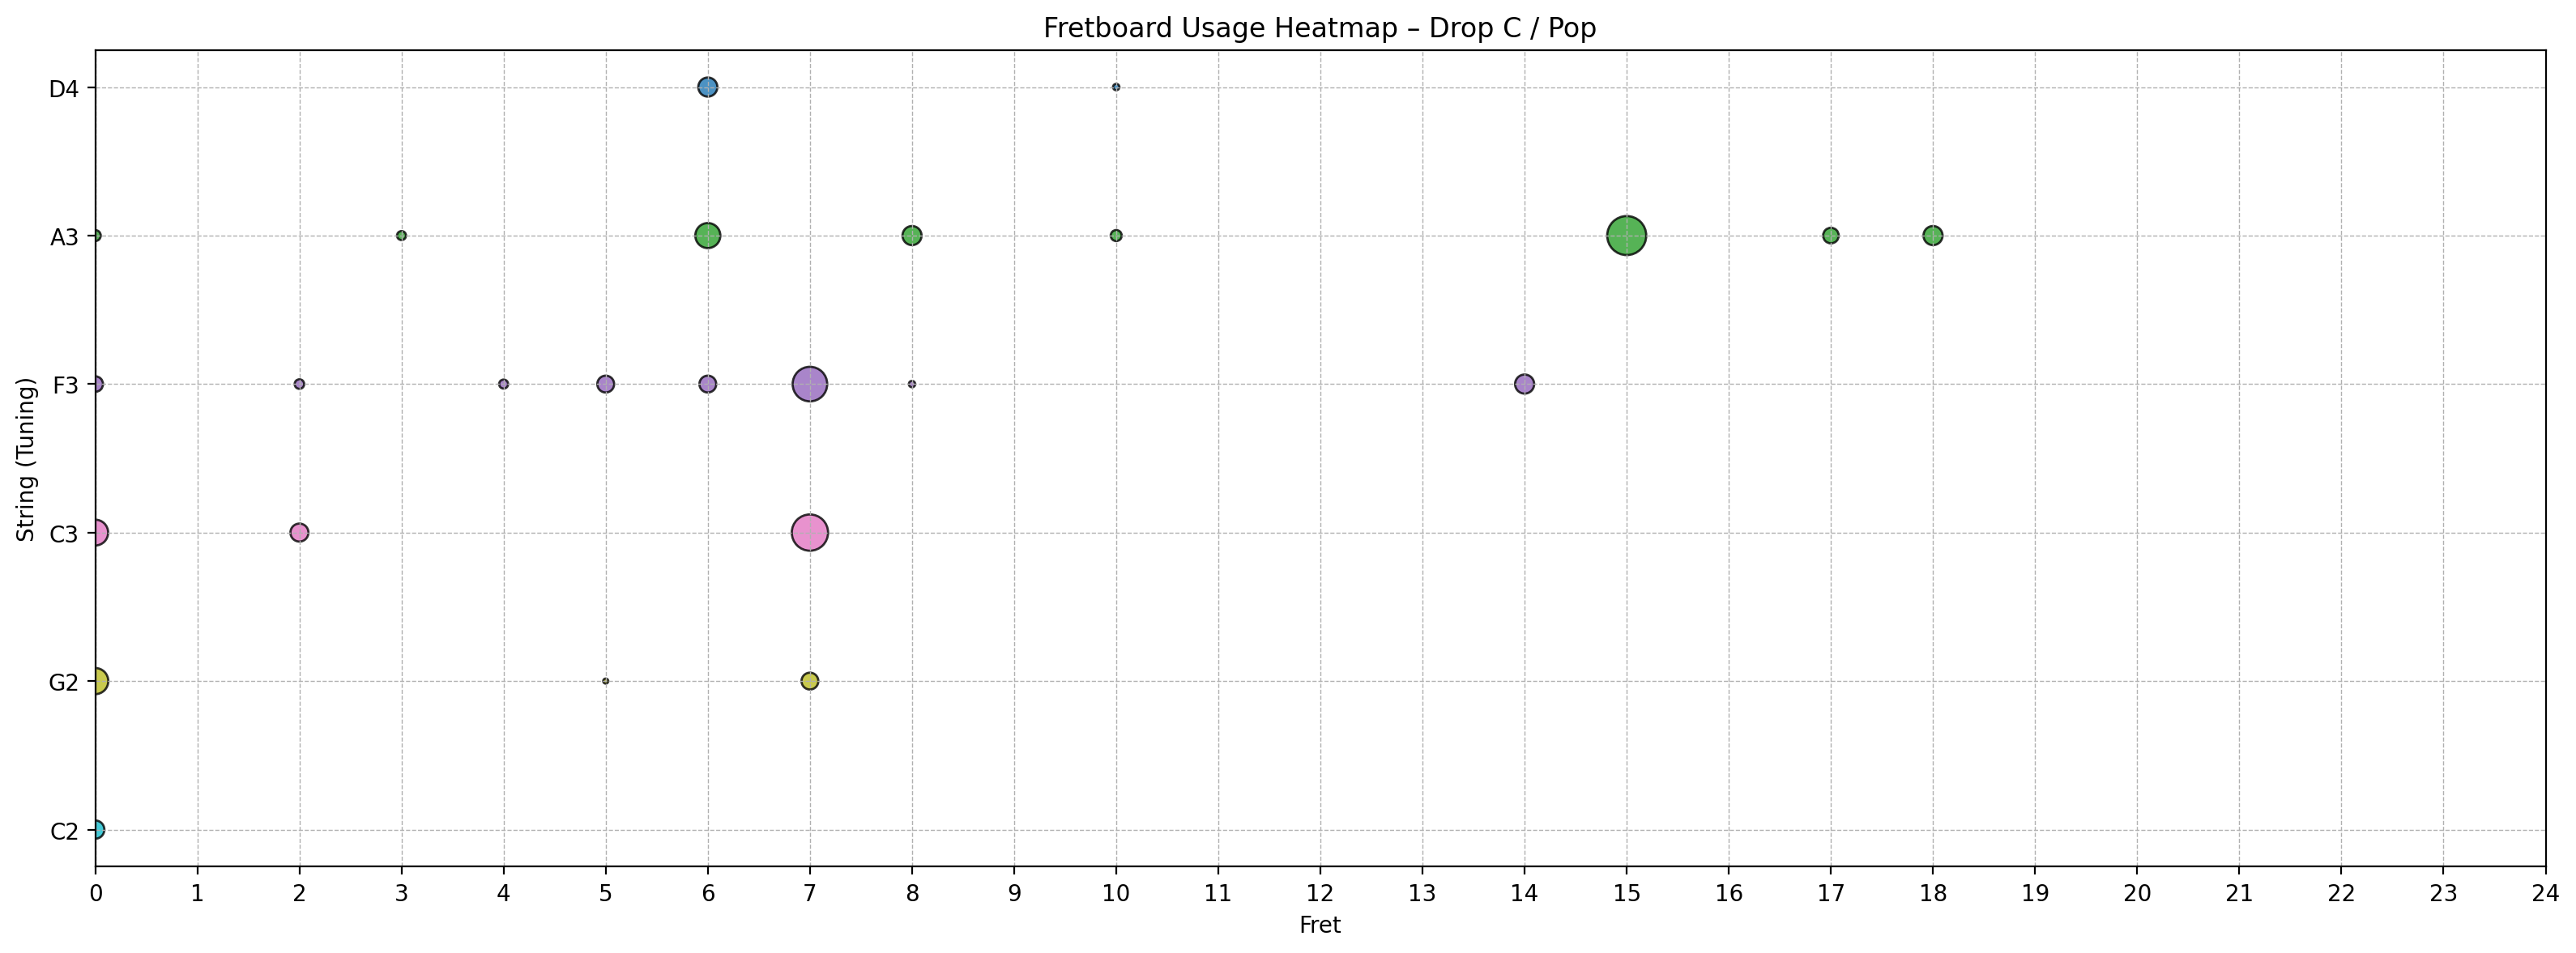

In [18]:
import matplotlib.pyplot as plt
from music21 import pitch
from collections import defaultdict
import json

# Load your full dataset (all tunings & genres in one file)
with open("analysis_results.json") as f:
    all_tracks = json.load(f)

# Known tuning presets and genre list
TUNING_LABELS = {
    "Standard": (64, 59, 55, 50, 45, 40),
    "Drop D": (64, 59, 55, 50, 45, 38),
    "Open D": (62, 57, 54, 50, 45, 38),
    "Drop C": (62, 57, 53, 48, 43, 36),
}
GENRES = ["Rock", "Metal", "Pop", "Folk", "Blues", "Jazz"]

# Flatten all track dicts from the nested structure
flat_tracks = []
for song in all_tracks:
    for track in song.get("tracks", []):
        track["title"] = song["title"]
        track["artist"] = song.get("artist", "")
        flat_tracks.append(track)

# Iterate by (tuning, genre)
for tuning_name, tuning_midi in TUNING_LABELS.items():
    for genre in GENRES:
        matching_tracks = [
            track for track in flat_tracks
            if track.get("tuning_folder") == tuning_name and track.get("genre") == genre
        ]

        if not matching_tracks:
            continue  # Skip combos with no data

        # Aggregate fret usage
        aggregate_freq = defaultdict(int)

        for track in matching_tracks:
            freq_data = track["string_fret_frequency"]
            for string_str, fret_dict in freq_data.items():
                string_num = int(string_str)
                for fret_str, count in fret_dict.items():
                    fret = int(fret_str)
                    aggregate_freq[(string_num, fret)] += count

        # Plot data prep
        x, y, sizes, colors = [], [], [], []
        for (string_num, fret), count in aggregate_freq.items():
            x.append(fret)
            y.append(6 - string_num)  # Flip so string 6 is y=5, string 1 is y=0
            sizes.append(count)
            colors.append(string_num)

        # Y-axis labels from tuning (flipped so high string is at top)
        string_labels = []
        for midi_val in reversed(tuning_midi):  # reversed: string 6 → 1 (top to bottom)
            p = pitch.Pitch()
            p.midi = midi_val
            string_labels.append(p.nameWithOctave)

        # Plot
        plt.figure(figsize=(16, 6))
        plt.scatter(x, y, s=sizes, c=colors, cmap='tab10', alpha=0.8, edgecolors='k')

        plt.xlim(0, 24)
        plt.xticks(range(0, 25))
        plt.yticks(range(6), string_labels)
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.xlabel("Fret")
        plt.ylabel("String (Tuning)")
        plt.title(f"Fretboard Usage Heatmap – {tuning_name} / {genre}")
        plt.tight_layout()
        plt.show()